In [ ]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm as cmx
import seaborn as sns
import networkx as nx
import warnings
warnings.filterwarnings('ignore')
sns.set()
%config InlineBackend.figure_format = 'retina'
# from matplotlib.backends.backend_pdf import PdfPages

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#@title
countries = [
{'timezones': ['Europe/Andorra'], 'code': 'AD', 'continent': 'Europe', 'name': 'Andorra', 'capital': 'Andorra la Vella'},
{'timezones': ['Asia/Kabul'], 'code': 'AF', 'continent': 'Asia', 'name': 'Afghanistan', 'capital': 'Kabul'},
{'timezones': ['America/Antigua'], 'code': 'AG', 'continent': 'North America', 'name': 'Antigua and Barbuda', 'capital': "St. John's"},
{'timezones': ['Europe/Tirane'], 'code': 'AL', 'continent': 'Europe', 'name': 'Albania', 'capital': 'Tirana'},
{'timezones': ['Asia/Yerevan'], 'code': 'AM', 'continent': 'Asia', 'name': 'Armenia', 'capital': 'Yerevan'},
{'timezones': ['Africa/Luanda'], 'code': 'AO', 'continent': 'Africa', 'name': 'Angola', 'capital': 'Luanda'},
{'timezones': ['America/Argentina/Buenos_Aires', 'America/Argentina/Cordoba', 'America/Argentina/Jujuy', 'America/Argentina/Tucuman', 'America/Argentina/Catamarca', 'America/Argentina/La_Rioja', 'America/Argentina/San_Juan', 'America/Argentina/Mendoza', 'America/Argentina/Rio_Gallegos', 'America/Argentina/Ushuaia'], 'code': 'AR', 'continent': 'South America', 'name': 'Argentina', 'capital': 'Buenos Aires'},
{'timezones': ['Europe/Vienna'], 'code': 'AT', 'continent': 'Europe', 'name': 'Austria', 'capital': 'Vienna'},
{'timezones': ['Australia/Lord_Howe', 'Australia/Hobart', 'Australia/Currie', 'Australia/Melbourne', 'Australia/Sydney', 'Australia/Broken_Hill', 'Australia/Brisbane', 'Australia/Lindeman', 'Australia/Adelaide', 'Australia/Darwin', 'Australia/Perth'], 'code': 'AU', 'continent': 'Oceania', 'name': 'Australia', 'capital': 'Canberra'},
{'timezones': ['Asia/Baku'], 'code': 'AZ', 'continent': 'Asia', 'name': 'Azerbaijan', 'capital': 'Baku'},
{'timezones': ['America/Barbados'], 'code': 'BB', 'continent': 'North America', 'name': 'Barbados', 'capital': 'Bridgetown'},
{'timezones': ['Asia/Dhaka'], 'code': 'BD', 'continent': 'Asia', 'name': 'Bangladesh', 'capital': 'Dhaka'},
{'timezones': ['Europe/Brussels'], 'code': 'BE', 'continent': 'Europe', 'name': 'Belgium', 'capital': 'Brussels'},
{'timezones': ['Africa/Ouagadougou'], 'code': 'BF', 'continent': 'Africa', 'name': 'Burkina Faso', 'capital': 'Ouagadougou'},
{'timezones': ['Europe/Sofia'], 'code': 'BG', 'continent': 'Europe', 'name': 'Bulgaria', 'capital': 'Sofia'},
{'timezones': ['Asia/Bahrain'], 'code': 'BH', 'continent': 'Asia', 'name': 'Bahrain', 'capital': 'Manama'},
{'timezones': ['Africa/Bujumbura'], 'code': 'BI', 'continent': 'Africa', 'name': 'Burundi', 'capital': 'Bujumbura'},
{'timezones': ['Africa/Porto-Novo'], 'code': 'BJ', 'continent': 'Africa', 'name': 'Benin', 'capital': 'Porto-Novo'},
{'timezones': ['Asia/Brunei'], 'code': 'BN', 'continent': 'Asia', 'name': 'Brunei Darussalam', 'capital': 'Bandar Seri Begawan'},
{'timezones': ['America/La_Paz'], 'code': 'BO', 'continent': 'South America', 'name': 'Bolivia', 'capital': 'Sucre'},
{'timezones': ['America/Noronha', 'America/Belem', 'America/Fortaleza', 'America/Recife', 'America/Araguaina', 'America/Maceio', 'America/Bahia', 'America/Sao_Paulo', 'America/Campo_Grande', 'America/Cuiaba', 'America/Porto_Velho', 'America/Boa_Vista', 'America/Manaus', 'America/Eirunepe', 'America/Rio_Branco'], 'code': 'BR', 'continent': 'South America', 'name': 'Brazil', 'capital': 'Bras\xc3\xadlia'},
{'timezones': ['America/Nassau'], 'code': 'BS', 'continent': 'North America', 'name': 'Bahamas', 'capital': 'Nassau'},
{'timezones': ['Asia/Thimphu'], 'code': 'BT', 'continent': 'Asia', 'name': 'Bhutan', 'capital': 'Thimphu'},
{'timezones': ['Africa/Gaborone'], 'code': 'BW', 'continent': 'Africa', 'name': 'Botswana', 'capital': 'Gaborone'},
{'timezones': ['Europe/Minsk'], 'code': 'BY', 'continent': 'Europe', 'name': 'Belarus', 'capital': 'Minsk'},
{'timezones': ['America/Belize'], 'code': 'BZ', 'continent': 'North America', 'name': 'Belize', 'capital': 'Belmopan'},
{'timezones': ['America/St_Johns', 'America/Halifax', 'America/Glace_Bay', 'America/Moncton', 'America/Goose_Bay', 'America/Blanc-Sablon', 'America/Montreal', 'America/Toronto', 'America/Nipigon', 'America/Thunder_Bay', 'America/Pangnirtung', 'America/Iqaluit', 'America/Atikokan', 'America/Rankin_Inlet', 'America/Winnipeg', 'America/Rainy_River', 'America/Cambridge_Bay', 'America/Regina', 'America/Swift_Current', 'America/Edmonton', 'America/Yellowknife', 'America/Inuvik', 'America/Dawson_Creek', 'America/Vancouver', 'America/Whitehorse', 'America/Dawson'], 'code': 'CA', 'continent': 'North America', 'name': 'Canada', 'capital': 'Ottawa'},
{'timezones': ['Africa/Kinshasa', 'Africa/Lubumbashi'], 'code': 'CD', 'continent': 'Africa', 'name': 'Democratic Republic of the Congo', 'capital': 'Kinshasa'},
{'timezones': ['Africa/Brazzaville'], 'code': 'CG', 'continent': 'Africa', 'name': 'Republic of the Congo', 'capital': 'Brazzaville'},
{'timezones': ['Africa/Abidjan'], 'code': 'CI', 'continent': 'Africa', 'name': "C\xc3\xb4te d'Ivoire", 'capital': 'Yamoussoukro'},
{'timezones': ['America/Santiago', 'Pacific/Easter'], 'code': 'CL', 'continent': 'South America', 'name': 'Chile', 'capital': 'Santiago'},
{'timezones': ['Africa/Douala'], 'code': 'CM', 'continent': 'Africa', 'name': 'Cameroon', 'capital': 'Yaound\xc3\xa9'},
{'timezones': ['Asia/Shanghai', 'Asia/Harbin', 'Asia/Chongqing', 'Asia/Urumqi', 'Asia/Kashgar'], 'code': 'CN', 'continent': 'Asia', 'name': "People's Republic of China", 'capital': 'Beijing'},
{'timezones': ['America/Bogota'], 'code': 'CO', 'continent': 'South America', 'name': 'Colombia', 'capital': 'Bogot\xc3\xa1'},
{'timezones': ['America/Costa_Rica'], 'code': 'CR', 'continent': 'North America', 'name': 'Costa Rica', 'capital': 'San Jos\xc3\xa9'},
{'timezones': ['America/Havana'], 'code': 'CU', 'continent': 'North America', 'name': 'Cuba', 'capital': 'Havana'},
{'timezones': ['Atlantic/Cape_Verde'], 'code': 'CV', 'continent': 'Africa', 'name': 'Cape Verde', 'capital': 'Praia'},
{'timezones': ['Asia/Nicosia'], 'code': 'CY', 'continent': 'Asia', 'name': 'Cyprus', 'capital': 'Nicosia'},
{'timezones': ['Europe/Prague'], 'code': 'CZ', 'continent': 'Europe', 'name': 'Czech Republic', 'capital': 'Prague'},
{'timezones': ['Europe/Berlin'], 'code': 'DE', 'continent': 'Europe', 'name': 'Germany', 'capital': 'Berlin'},
{'timezones': ['Africa/Djibouti'], 'code': 'DJ', 'continent': 'Africa', 'name': 'Djibouti', 'capital': 'Djibouti City'},
{'timezones': ['Europe/Copenhagen'], 'code': 'DK', 'continent': 'Europe', 'name': 'Denmark', 'capital': 'Copenhagen'},
{'timezones': ['America/Dominica'], 'code': 'DM', 'continent': 'North America', 'name': 'Dominica', 'capital': 'Roseau'},
{'timezones': ['America/Santo_Domingo'], 'code': 'DO', 'continent': 'North America', 'name': 'Dominican Republic', 'capital': 'Santo Domingo'},
{'timezones': ['America/Guayaquil', 'Pacific/Galapagos'], 'code': 'EC', 'continent': 'South America', 'name': 'Ecuador', 'capital': 'Quito'},
{'timezones': ['Europe/Tallinn'], 'code': 'EE', 'continent': 'Europe', 'name': 'Estonia', 'capital': 'Tallinn'},
{'timezones': ['Africa/Cairo'], 'code': 'EG', 'continent': 'Africa', 'name': 'Egypt', 'capital': 'Cairo'},
{'timezones': ['Africa/Asmera'], 'code': 'ER', 'continent': 'Africa', 'name': 'Eritrea', 'capital': 'Asmara'},
{'timezones': ['Africa/Addis_Ababa'], 'code': 'ET', 'continent': 'Africa', 'name': 'Ethiopia', 'capital': 'Addis Ababa'},
{'timezones': ['Europe/Helsinki'], 'code': 'FI', 'continent': 'Europe', 'name': 'Finland', 'capital': 'Helsinki'},
{'timezones': ['Pacific/Fiji'], 'code': 'FJ', 'continent': 'Oceania', 'name': 'Fiji', 'capital': 'Suva'},
{'timezones': ['Europe/Paris'], 'code': 'FR', 'continent': 'Europe', 'name': 'France', 'capital': 'Paris'},
{'timezones': ['Africa/Libreville'], 'code': 'GA', 'continent': 'Africa', 'name': 'Gabon', 'capital': 'Libreville'},
{'timezones': ['Asia/Tbilisi'], 'code': 'GE', 'continent': 'Asia', 'name': 'Georgia', 'capital': 'Tbilisi'},
{'timezones': ['Africa/Accra'], 'code': 'GH', 'continent': 'Africa', 'name': 'Ghana', 'capital': 'Accra'},
{'timezones': ['Africa/Banjul'], 'code': 'GM', 'continent': 'Africa', 'name': 'The Gambia', 'capital': 'Banjul'},
{'timezones': ['Africa/Conakry'], 'code': 'GN', 'continent': 'Africa', 'name': 'Guinea', 'capital': 'Conakry'},
{'timezones': ['Europe/Athens'], 'code': 'GR', 'continent': 'Europe', 'name': 'Greece', 'capital': 'Athens'},
{'timezones': ['America/Guatemala'], 'code': 'GT', 'continent': 'North America', 'name': 'Guatemala', 'capital': 'Guatemala City'},
{'timezones': ['America/Guatemala'], 'code': 'GT', 'continent': 'North America', 'name': 'Haiti', 'capital': 'Port-au-Prince'},
{'timezones': ['Africa/Bissau'], 'code': 'GW', 'continent': 'Africa', 'name': 'Guinea-Bissau', 'capital': 'Bissau'},
{'timezones': ['America/Guyana'], 'code': 'GY', 'continent': 'South America', 'name': 'Guyana', 'capital': 'Georgetown'},
{'timezones': ['America/Tegucigalpa'], 'code': 'HN', 'continent': 'North America', 'name': 'Honduras', 'capital': 'Tegucigalpa'},
{'timezones': ['Europe/Budapest'], 'code': 'HU', 'continent': 'Europe', 'name': 'Hungary', 'capital': 'Budapest'},
{'timezones': ['Asia/Jakarta', 'Asia/Pontianak', 'Asia/Makassar', 'Asia/Jayapura'], 'code': 'ID', 'continent': 'Asia', 'name': 'Indonesia', 'capital': 'Jakarta'},
{'timezones': ['Europe/Dublin'], 'code': 'IE', 'continent': 'Europe', 'name': 'Republic of Ireland', 'capital': 'Dublin'},
{'timezones': ['Asia/Jerusalem'], 'code': 'IL', 'continent': 'Asia', 'name': 'Israel', 'capital': 'Jerusalem'},
{'timezones': ['Asia/Calcutta'], 'code': 'IN', 'continent': 'Asia', 'name': 'India', 'capital': 'New Delhi'},
{'timezones': ['Asia/Baghdad'], 'code': 'IQ', 'continent': 'Asia', 'name': 'Iraq', 'capital': 'Baghdad'},
{'timezones': ['Asia/Tehran'], 'code': 'IR', 'continent': 'Asia', 'name': 'Iran', 'capital': 'Tehran'},
{'timezones': ['Atlantic/Reykjavik'], 'code': 'IS', 'continent': 'Europe', 'name': 'Iceland', 'capital': 'Reykjav\xc3\xadk'},
{'timezones': ['Europe/Rome'], 'code': 'IT', 'continent': 'Europe', 'name': 'Italy', 'capital': 'Rome'},
{'timezones': ['America/Jamaica'], 'code': 'JM', 'continent': 'North America', 'name': 'Jamaica', 'capital': 'Kingston'},
{'timezones': ['Asia/Amman'], 'code': 'JO', 'continent': 'Asia', 'name': 'Jordan', 'capital': 'Amman'},
{'timezones': ['Asia/Tokyo'], 'code': 'JP', 'continent': 'Asia', 'name': 'Japan', 'capital': 'Tokyo'},
{'timezones': ['Africa/Nairobi'], 'code': 'KE', 'continent': 'Africa', 'name': 'Kenya', 'capital': 'Nairobi'},
{'timezones': ['Asia/Bishkek'], 'code': 'KG', 'continent': 'Asia', 'name': 'Kyrgyzstan', 'capital': 'Bishkek'},
{'timezones': ['Pacific/Tarawa', 'Pacific/Enderbury', 'Pacific/Kiritimati'], 'code': 'KI', 'continent': 'Oceania', 'name': 'Kiribati', 'capital': 'Tarawa'},
{'timezones': ['Asia/Pyongyang'], 'code': 'KP', 'continent': 'Asia', 'name': 'North Korea', 'capital': 'Pyongyang'},
{'timezones': ['Asia/Seoul'], 'code': 'KR', 'continent': 'Asia', 'name': 'South Korea', 'capital': 'Seoul'},
{'timezones': ['Asia/Kuwait'], 'code': 'KW', 'continent': 'Asia', 'name': 'Kuwait', 'capital': 'Kuwait City'},
{'timezones': ['Asia/Beirut'], 'code': 'LB', 'continent': 'Asia', 'name': 'Lebanon', 'capital': 'Beirut'},
{'timezones': ['Europe/Vaduz'], 'code': 'LI', 'continent': 'Europe', 'name': 'Liechtenstein', 'capital': 'Vaduz'},
{'timezones': ['Africa/Monrovia'], 'code': 'LR', 'continent': 'Africa', 'name': 'Liberia', 'capital': 'Monrovia'},
{'timezones': ['Africa/Maseru'], 'code': 'LS', 'continent': 'Africa', 'name': 'Lesotho', 'capital': 'Maseru'},
{'timezones': ['Europe/Vilnius'], 'code': 'LT', 'continent': 'Europe', 'name': 'Lithuania', 'capital': 'Vilnius'},
{'timezones': ['Europe/Luxembourg'], 'code': 'LU', 'continent': 'Europe', 'name': 'Luxembourg', 'capital': 'Luxembourg City'},
{'timezones': ['Europe/Riga'], 'code': 'LV', 'continent': 'Europe', 'name': 'Latvia', 'capital': 'Riga'},
{'timezones': ['Africa/Tripoli'], 'code': 'LY', 'continent': 'Africa', 'name': 'Libya', 'capital': 'Tripoli'},
{'timezones': ['Indian/Antananarivo'], 'code': 'MG', 'continent': 'Africa', 'name': 'Madagascar', 'capital': 'Antananarivo'},
{'timezones': ['Pacific/Majuro', 'Pacific/Kwajalein'], 'code': 'MH', 'continent': 'Oceania', 'name': 'Marshall Islands', 'capital': 'Majuro'},
{'timezones': ['Europe/Skopje'], 'code': 'MK', 'continent': 'Europe', 'name': 'Macedonia', 'capital': 'Skopje'},
{'timezones': ['Africa/Bamako'], 'code': 'ML', 'continent': 'Africa', 'name': 'Mali', 'capital': 'Bamako'},
{'timezones': ['Asia/Rangoon'], 'code': 'MM', 'continent': 'Asia', 'name': 'Myanmar', 'capital': 'Naypyidaw'},
{'timezones': ['Asia/Ulaanbaatar', 'Asia/Hovd', 'Asia/Choibalsan'], 'code': 'MN', 'continent': 'Asia', 'name': 'Mongolia', 'capital': 'Ulaanbaatar'},
{'timezones': ['Africa/Nouakchott'], 'code': 'MR', 'continent': 'Africa', 'name': 'Mauritania', 'capital': 'Nouakchott'},
{'timezones': ['Europe/Malta'], 'code': 'MT', 'continent': 'Europe', 'name': 'Malta', 'capital': 'Valletta'},
{'timezones': ['Indian/Mauritius'], 'code': 'MU', 'continent': 'Africa', 'name': 'Mauritius', 'capital': 'Port Louis'},
{'timezones': ['Indian/Maldives'], 'code': 'MV', 'continent': 'Asia', 'name': 'Maldives', 'capital': 'Mal\xc3\xa9'},
{'timezones': ['Africa/Blantyre'], 'code': 'MW', 'continent': 'Africa', 'name': 'Malawi', 'capital': 'Lilongwe'},
{'timezones': ['America/Mexico_City', 'America/Cancun', 'America/Merida', 'America/Monterrey', 'America/Mazatlan', 'America/Chihuahua', 'America/Hermosillo', 'America/Tijuana'], 'code': 'MX', 'continent': 'North America', 'name': 'Mexico', 'capital': 'Mexico City'},
{'timezones': ['Asia/Kuala_Lumpur', 'Asia/Kuching'], 'code': 'MY', 'continent': 'Asia', 'name': 'Malaysia', 'capital': 'Kuala Lumpur'},
{'timezones': ['Africa/Maputo'], 'code': 'MZ', 'continent': 'Africa', 'name': 'Mozambique', 'capital': 'Maputo'},
{'timezones': ['Africa/Windhoek'], 'code': 'NA', 'continent': 'Africa', 'name': 'Namibia', 'capital': 'Windhoek'},
{'timezones': ['Africa/Niamey'], 'code': 'NE', 'continent': 'Africa', 'name': 'Niger', 'capital': 'Niamey'},
{'timezones': ['Africa/Lagos'], 'code': 'NG', 'continent': 'Africa', 'name': 'Nigeria', 'capital': 'Abuja'},
{'timezones': ['America/Managua'], 'code': 'NI', 'continent': 'North America', 'name': 'Nicaragua', 'capital': 'Managua'},
{'timezones': ['Europe/Amsterdam'], 'code': 'NL', 'continent': 'Europe', 'name': 'Kingdom of the Netherlands', 'capital': 'Amsterdam'},
{'timezones': ['Europe/Oslo'], 'code': 'NO', 'continent': 'Europe', 'name': 'Norway', 'capital': 'Oslo'},
{'timezones': ['Asia/Katmandu'], 'code': 'NP', 'continent': 'Asia', 'name': 'Nepal', 'capital': 'Kathmandu'},
{'timezones': ['Pacific/Nauru'], 'code': 'NR', 'continent': 'Oceania', 'name': 'Nauru', 'capital': 'Yaren'},
{'timezones': ['Pacific/Auckland', 'Pacific/Chatham'], 'code': 'NZ', 'continent': 'Oceania', 'name': 'New Zealand', 'capital': 'Wellington'},
{'timezones': ['Asia/Muscat'], 'code': 'OM', 'continent': 'Asia', 'name': 'Oman', 'capital': 'Muscat'},
{'timezones': ['America/Panama'], 'code': 'PA', 'continent': 'North America', 'name': 'Panama', 'capital': 'Panama City'},
{'timezones': ['America/Lima'], 'code': 'PE', 'continent': 'South America', 'name': 'Peru', 'capital': 'Lima'},
{'timezones': ['Pacific/Port_Moresby'], 'code': 'PG', 'continent': 'Oceania', 'name': 'Papua New Guinea', 'capital': 'Port Moresby'},
{'timezones': ['Asia/Manila'], 'code': 'PH', 'continent': 'Asia', 'name': 'Philippines', 'capital': 'Manila'},
{'timezones': ['Asia/Karachi'], 'code': 'PK', 'continent': 'Asia', 'name': 'Pakistan', 'capital': 'Islamabad'},
{'timezones': ['Europe/Warsaw'], 'code': 'PL', 'continent': 'Europe', 'name': 'Poland', 'capital': 'Warsaw'},
{'timezones': ['Europe/Lisbon', 'Atlantic/Madeira', 'Atlantic/Azores'], 'code': 'PT', 'continent': 'Europe', 'name': 'Portugal', 'capital': 'Lisbon'},
{'timezones': ['Pacific/Palau'], 'code': 'PW', 'continent': 'Oceania', 'name': 'Palau', 'capital': 'Ngerulmud'},
{'timezones': ['America/Asuncion'], 'code': 'PY', 'continent': 'South America', 'name': 'Paraguay', 'capital': 'Asunci\xc3\xb3n'},
{'timezones': ['Asia/Qatar'], 'code': 'QA', 'continent': 'Asia', 'name': 'Qatar', 'capital': 'Doha'},
{'timezones': ['Europe/Bucharest'], 'code': 'RO', 'continent': 'Europe', 'name': 'Romania', 'capital': 'Bucharest'},
{'timezones': ['Europe/Kaliningrad', 'Europe/Moscow', 'Europe/Volgograd', 'Europe/Samara', 'Asia/Yekaterinburg', 'Asia/Omsk', 'Asia/Novosibirsk', 'Asia/Krasnoyarsk', 'Asia/Irkutsk', 'Asia/Yakutsk', 'Asia/Vladivostok', 'Asia/Sakhalin', 'Asia/Magadan', 'Asia/Kamchatka', 'Asia/Anadyr'], 'code': 'RU', 'continent': 'Europe', 'name': 'Russia', 'capital': 'Moscow'},
{'timezones': ['Africa/Kigali'], 'code': 'RW', 'continent': 'Africa', 'name': 'Rwanda', 'capital': 'Kigali'},
{'timezones': ['Asia/Riyadh'], 'code': 'SA', 'continent': 'Asia', 'name': 'Saudi Arabia', 'capital': 'Riyadh'},
{'timezones': ['Pacific/Guadalcanal'], 'code': 'SB', 'continent': 'Oceania', 'name': 'Solomon Islands', 'capital': 'Honiara'},
{'timezones': ['Indian/Mahe'], 'code': 'SC', 'continent': 'Africa', 'name': 'Seychelles', 'capital': 'Victoria'},
{'timezones': ['Africa/Khartoum'], 'code': 'SD', 'continent': 'Africa', 'name': 'Sudan', 'capital': 'Khartoum'},
{'timezones': ['Europe/Stockholm'], 'code': 'SE', 'continent': 'Europe', 'name': 'Sweden', 'capital': 'Stockholm'},
{'timezones': ['Asia/Singapore'], 'code': 'SG', 'continent': 'Asia', 'name': 'Singapore', 'capital': 'Singapore'},
{'timezones': ['Europe/Ljubljana'], 'code': 'SI', 'continent': 'Europe', 'name': 'Slovenia', 'capital': 'Ljubljana'},
{'timezones': ['Europe/Bratislava'], 'code': 'SK', 'continent': 'Europe', 'name': 'Slovakia', 'capital': 'Bratislava'},
{'timezones': ['Africa/Freetown'], 'code': 'SL', 'continent': 'Africa', 'name': 'Sierra Leone', 'capital': 'Freetown'},
{'timezones': ['Europe/San_Marino'], 'code': 'SM', 'continent': 'Europe', 'name': 'San Marino', 'capital': 'San Marino'},
{'timezones': ['Africa/Dakar'], 'code': 'SN', 'continent': 'Africa', 'name': 'Senegal', 'capital': 'Dakar'},
{'timezones': ['Africa/Mogadishu'], 'code': 'SO', 'continent': 'Africa', 'name': 'Somalia', 'capital': 'Mogadishu'},
{'timezones': ['America/Paramaribo'], 'code': 'SR', 'continent': 'South America', 'name': 'Suriname', 'capital': 'Paramaribo'},
{'timezones': ['Africa/Sao_Tome'], 'code': 'ST', 'continent': 'Africa', 'name': 'S\xc3\xa3o Tom\xc3\xa9 and Pr\xc3\xadncipe', 'capital': 'S\xc3\xa3o Tom\xc3\xa9'},
{'timezones': ['Asia/Damascus'], 'code': 'SY', 'continent': 'Asia', 'name': 'Syria', 'capital': 'Damascus'},
{'timezones': ['Africa/Lome'], 'code': 'TG', 'continent': 'Africa', 'name': 'Togo', 'capital': 'Lom\xc3\xa9'},
{'timezones': ['Asia/Bangkok'], 'code': 'TH', 'continent': 'Asia', 'name': 'Thailand', 'capital': 'Bangkok'},
{'timezones': ['Asia/Dushanbe'], 'code': 'TJ', 'continent': 'Asia', 'name': 'Tajikistan', 'capital': 'Dushanbe'},
{'timezones': ['Asia/Ashgabat'], 'code': 'TM', 'continent': 'Asia', 'name': 'Turkmenistan', 'capital': 'Ashgabat'},
{'timezones': ['Africa/Tunis'], 'code': 'TN', 'continent': 'Africa', 'name': 'Tunisia', 'capital': 'Tunis'},
{'timezones': ['Pacific/Tongatapu'], 'code': 'TO', 'continent': 'Oceania', 'name': 'Tonga', 'capital': 'Nuku\xca\xbbalofa'},
{'timezones': ['Europe/Istanbul'], 'code': 'TR', 'continent': 'Asia', 'name': 'Turkey', 'capital': 'Ankara'},
{'timezones': ['America/Port_of_Spain'], 'code': 'TT', 'continent': 'North America', 'name': 'Trinidad and Tobago', 'capital': 'Port of Spain'},
{'timezones': ['Pacific/Funafuti'], 'code': 'TV', 'continent': 'Oceania', 'name': 'Tuvalu', 'capital': 'Funafuti'},
{'timezones': ['Africa/Dar_es_Salaam'], 'code': 'TZ', 'continent': 'Africa', 'name': 'Tanzania', 'capital': 'Dodoma'},
{'timezones': ['Europe/Kiev', 'Europe/Uzhgorod', 'Europe/Zaporozhye', 'Europe/Simferopol'], 'code': 'UA', 'continent': 'Europe', 'name': 'Ukraine', 'capital': 'Kiev'},
{'timezones': ['Africa/Kampala'], 'code': 'UG', 'continent': 'Africa', 'name': 'Uganda', 'capital': 'Kampala'},
{'timezones': ['America/New_York', 'America/Detroit', 'America/Kentucky/Louisville', 'America/Kentucky/Monticello', 'America/Indiana/Indianapolis', 'America/Indiana/Marengo', 'America/Indiana/Knox', 'America/Indiana/Vevay', 'America/Chicago', 'America/Indiana/Vincennes', 'America/Indiana/Petersburg', 'America/Menominee', 'America/North_Dakota/Center', 'America/North_Dakota/New_Salem', 'America/Denver', 'America/Boise', 'America/Shiprock', 'America/Phoenix', 'America/Los_Angeles', 'America/Anchorage', 'America/Juneau', 'America/Yakutat', 'America/Nome', 'America/Adak', 'Pacific/Honolulu'], 'code': 'US', 'continent': 'North America', 'name': 'United States', 'capital': 'Washington, D.C.'},
{'timezones': ['America/Montevideo'], 'code': 'UY', 'continent': 'South America', 'name': 'Uruguay', 'capital': 'Montevideo'},
{'timezones': ['Asia/Samarkand', 'Asia/Tashkent'], 'code': 'UZ', 'continent': 'Asia', 'name': 'Uzbekistan', 'capital': 'Tashkent'},
{'timezones': ['Europe/Vatican'], 'code': 'VA', 'continent': 'Europe', 'name': 'Vatican City', 'capital': 'Vatican City'},
{'timezones': ['America/Caracas'], 'code': 'VE', 'continent': 'South America', 'name': 'Venezuela', 'capital': 'Caracas'},
{'timezones': ['Asia/Saigon'], 'code': 'VN', 'continent': 'Asia', 'name': 'Vietnam', 'capital': 'Hanoi'},
{'timezones': ['Pacific/Efate'], 'code': 'VU', 'continent': 'Oceania', 'name': 'Vanuatu', 'capital': 'Port Vila'},
{'timezones': ['Asia/Aden'], 'code': 'YE', 'continent': 'Asia', 'name': 'Yemen', 'capital': "Sana'a"},
{'timezones': ['Africa/Lusaka'], 'code': 'ZM', 'continent': 'Africa', 'name': 'Zambia', 'capital': 'Lusaka'},
{'timezones': ['Africa/Harare'], 'code': 'ZW', 'continent': 'Africa', 'name': 'Zimbabwe', 'capital': 'Harare'},
{'timezones': ['Africa/Algiers'], 'code': 'DZ', 'continent': 'Africa', 'name': 'Algeria', 'capital': 'Algiers'},
{'timezones': ['Europe/Sarajevo'], 'code': 'BA', 'continent': 'Europe', 'name': 'Bosnia and Herzegovina', 'capital': 'Sarajevo'},
{'timezones': ['Asia/Phnom_Penh'], 'code': 'KH', 'continent': 'Asia', 'name': 'Cambodia', 'capital': 'Phnom Penh'},
{'timezones': ['Africa/Bangui'], 'code': 'CF', 'continent': 'Africa', 'name': 'Central African Republic', 'capital': 'Bangui'},
{'timezones': ['Africa/Ndjamena'], 'code': 'TD', 'continent': 'Africa', 'name': 'Chad', 'capital': "N'Djamena"},
{'timezones': ['Indian/Comoro'], 'code': 'KM', 'continent': 'Africa', 'name': 'Comoros', 'capital': 'Moroni'},
{'timezones': ['Europe/Zagreb'], 'code': 'HR', 'continent': 'Europe', 'name': 'Croatia', 'capital': 'Zagreb'},
{'timezones': ['Asia/Dili'], 'code': 'TL', 'continent': 'Asia', 'name': 'East Timor', 'capital': 'Dili'},
{'timezones': ['America/El_Salvador'], 'code': 'SV', 'continent': 'North America', 'name': 'El Salvador', 'capital': 'San Salvador'},
{'timezones': ['Africa/Malabo'], 'code': 'GQ', 'continent': 'Africa', 'name': 'Equatorial Guinea', 'capital': 'Malabo'},
{'timezones': ['America/Grenada'], 'code': 'GD', 'continent': 'North America', 'name': 'Grenada', 'capital': "St. George's"},
{'timezones': ['Asia/Almaty', 'Asia/Qyzylorda', 'Asia/Aqtobe', 'Asia/Aqtau', 'Asia/Oral'], 'code': 'KZ', 'continent': 'Asia', 'name': 'Kazakhstan', 'capital': 'Astana'},
{'timezones': ['Asia/Vientiane'], 'code': 'LA', 'continent': 'Asia', 'name': 'Laos', 'capital': 'Vientiane'},
{'timezones': ['Pacific/Truk', 'Pacific/Ponape', 'Pacific/Kosrae'], 'code': 'FM', 'continent': 'Oceania', 'name': 'Federated States of Micronesia', 'capital': 'Palikir'},
{'timezones': ['Europe/Chisinau'], 'code': 'MD', 'continent': 'Europe', 'name': 'Moldova', 'capital': 'Chi\xc5\x9fin\xc4\x83u'},
{'timezones': ['Europe/Monaco'], 'code': 'MC', 'continent': 'Europe', 'name': 'Monaco', 'capital': 'Monaco'},
{'timezones': ['Europe/Podgorica'], 'code': 'ME', 'continent': 'Europe', 'name': 'Montenegro', 'capital': 'Podgorica'},
{'timezones': ['Africa/Casablanca'], 'code': 'MA', 'continent': 'Africa', 'name': 'Morocco', 'capital': 'Rabat'},
{'timezones': ['America/St_Kitts'], 'code': 'KN', 'continent': 'North America', 'name': 'Saint Kitts and Nevis', 'capital': 'Basseterre'},
{'timezones': ['America/St_Lucia'], 'code': 'LC', 'continent': 'North America', 'name': 'Saint Lucia', 'capital': 'Castries'},
{'timezones': ['America/St_Vincent'], 'code': 'VC', 'continent': 'North America', 'name': 'Saint Vincent and the Grenadines', 'capital': 'Kingstown'},
{'timezones': ['Pacific/Apia'], 'code': 'WS', 'continent': 'Oceania', 'name': 'Samoa', 'capital': 'Apia'},
{'timezones': ['Europe/Belgrade'], 'code': 'RS', 'continent': 'Europe', 'name': 'Serbia', 'capital': 'Belgrade'},
{'timezones': ['Africa/Johannesburg'], 'code': 'ZA', 'continent': 'Africa', 'name': 'South Africa', 'capital': 'Pretoria'},
{'timezones': ['Europe/Madrid', 'Africa/Ceuta', 'Atlantic/Canary'], 'code': 'ES', 'continent': 'Europe', 'name': 'Spain', 'capital': 'Madrid'},
{'timezones': ['Asia/Colombo'], 'code': 'LK', 'continent': 'Asia', 'name': 'Sri Lanka', 'capital': 'Sri Jayewardenepura Kotte'},
{'timezones': ['Africa/Mbabane'], 'code': 'SZ', 'continent': 'Africa', 'name': 'Swaziland', 'capital': 'Mbabane'},
{'timezones': ['Europe/Zurich'], 'code': 'CH', 'continent': 'Europe', 'name': 'Switzerland', 'capital': 'Bern'},
{'timezones': ['Asia/Dubai'], 'code': 'AE', 'continent': 'Asia', 'name': 'United Arab Emirates', 'capital': 'Abu Dhabi'},
{'timezones': ['Europe/London'], 'code': 'GB', 'continent': 'Europe', 'name': 'United Kingdom', 'capital': 'London'},
]

In [ ]:
#@title
eu = []
asia = []
africa = []
na = []
sa = []
oc = []
for i in range(len(countries)):
  for k,v in countries[i].items():
    if v == 'Europe':
      eu.append(list(countries[i].values())[3])
    elif v == 'Asia':
      asia.append(list(countries[i].values())[3])
    elif v == 'Africa':
      africa.append(list(countries[i].values())[3])
    elif v == 'North America':
      na.append(list(countries[i].values())[3])
    elif v == 'South America':
      sa.append(list(countries[i].values())[3])
    elif v == 'Oceania':
      oc.append(list(countries[i].values())[3])
      
del eu[28]
eu.append('Bosnia-Herzegovina')
eu.append('England')
eu.append('Ireland')
eu.append('Kosovo')
eu.append('Netherlands')
eu.append('North Macedonia')
eu.append('Guadeloupe')
africa.append('Congo')
africa.append("Cote d'Ivoire")
africa.append('DR Congo')
asia.append('Korea, North')
asia.append('Korea, South')

In [ ]:
def get_season(soup):
  """
  Парсим выбранный сезон.
  """
  season = ''
  selector = soup.find_all('div', {'class': 'inline-select'})
  for item in selector:
    for i in item.find_all('option'):
      if i.get('selected') == 'selected' and len(i.get('value')) == 4:
        season = i.text

  return season

In [ ]:
def get_club_names(soup):
  """
  Парсим имена клубов(добавляем их 2 раза, т.к. две таблицы - in and out).
  """
  club_names = []
  table_headers = soup.find_all('div', {'class': 'table-header'})
  for item in table_headers:
    # print(item)
    # print('_'*40)
    if item.find('a').find('img').get('alt') != 'Mail':
      club_names.append(item.find('a').find('img').get('alt'))
      club_names.append(item.find('a').find('img').get('alt'))

  return club_names

In [ ]:
def get_player_names(soup):
  """
  Парсим имена игроков.
  """
  players_info = []
  players_names = []
  table_bodys = soup.find_all('div', {'class': 'responsive-table'})
  for item in table_bodys:
    for row in item.find('tbody').find_all('tr'):
        for j in row.find('div', {'class': 'di nowrap'}):
          players_names.append(j.find('a').text)

  return players_names

In [ ]:
def in_out(soup, club_names):
  """
  Список для добавления in и out в финальный список.
  """
  club_names = club_names
  movement = []
  for i in range(len(club_names)):
    if i%2 == 0:
      movement.append('In')
    else:
      movement.append('Out')

  return movement

In [ ]:
def get_nationality(soup):  
  """
  Парсим национальности игроков.
  """
  players_nat = []
  table_bodys = soup.find_all('div', {'class': 'responsive-table'})
  for item in table_bodys:
    for row in item.find('tbody').find_all('tr'):
      for i in row.find_all('td', {'class': 'zentriert nat-transfer-cell'}):
        players_nat.append(i.find('img').get('alt'))
    
  return players_nat

In [ ]:
def get_info(soup, season, club_names, players_names, movement, nationality):
  """
  Парсим всю оставшиюся информацию, добавляем сезон.
  В качестве последнего элемента добавляем in/out.
  Имена игроков добавляются криво, поэтому добавляем их из отдельного списка.
  Также добавляем национальность игрока из отдельного списка.
  Если последний элемент 'In', меняет местами клубы.
  Вставляем пробелы в информацию о трансферах для лучшей визуализации.
  В конце удаляем ненужные элементы.
  """

  players_info = []
  season = season
  club_names = club_names
  players_names = players_names
  movement = movement
  players_nat = nationality

  table_bodys = soup.find_all('div', {'class': 'responsive-table'})
  for item in range(len(table_bodys)):
    for row in table_bodys[item].find('tbody').find_all('tr'):
      cols = row.find_all('td')
      cols = [ele.text for ele in cols]
      cols[6] = club_names[item]
      cols.append(season)
      cols.append(movement[item])
      players_info.append(cols)

  for player in range(len(players_info)):
    players_info[player][0] = players_names[player]
    players_info[player][2] = players_nat[player]

    if players_info[player][-1] == 'In':
      spam = players_info[player][7]
      players_info[player][7] = players_info[player][6]
      players_info[player][6] = spam

    if players_info[player][8].startswith('End'):
      players_info[player][8] = players_info[player][8][:11] + ': ' + players_info[player][8][11:]
    elif players_info[player][8].startswith('Loan'):
      players_info[player][8] = players_info[player][8][:9] + ' ' + players_info[player][8][9:]

    del players_info[player][-1]
    del players_info[player][5]
    del players_info[player][4]

  return players_info

In [ ]:
"""
Считываем все файлы.
"""
path = r'/content'
all_files = glob.glob(os.path.join(path, "*.html"))
print(all_files)

['/content/TransferMarket_19.html', '/content/TransferMarket_12.html', '/content/TransferMarket_10.html', '/content/TransferMarket_15.html', '/content/TransferMarket_18.html', '/content/TransferMarket_9.html', '/content/TransferMarket_14.html', '/content/TransferMarket_17.html', '/content/TransferMarket_16.html', '/content/TransferMarket_13.html']


In [ ]:
"""
Создаем общий датафрейм.
"""
df_list = []
columns = ['Players Name', 'Age', 'Nationality', 'Position', 'Club from', 'Club to', 'Transfer type', 'Season']
for file_name in all_files:
  with open(file_name, "r") as f:
      contents = f.read()
      soup = BeautifulSoup(contents, 'lxml')  
      season = get_info(soup, get_season(soup), get_club_names(soup), get_player_names(soup), in_out(soup, get_club_names(soup)), get_nationality(soup))
      # print(season)
      df_season = pd.DataFrame(season, columns = columns)
      df_list.append(df_season)

In [ ]:
df = pd.concat(df_list, axis=0, ignore_index=True)
df.head(10)

Players Name Age  ...              Transfer type Season
0               Malcom  22  ...                    £36.00m  19/20
1       Douglas Santos  25  ...                    £10.80m  19/20
2  Vyacheslav Karavaev  24  ...                     £7.20m  19/20
3     Aleksey Sutormin  25  ...                     £2.70m  19/20
4       Danil Krugovoy  21  ...                     £1.80m  19/20
5        Yordan Osorio  25  ...            Loan fee: £900k  19/20
6   Aleksandr Vasyutin  24  ...                      £630k  19/20
7      Emiliano Rigoni  26  ...   End of loan: Feb 1, 2020  19/20
8          Leon Musaev  20  ...                          -  19/20
9      Luka Djordjevic  24  ...  End of loan: Jun 30, 2019  19/20

[10 rows x 8 columns]

In [ ]:
df.tail(10)

Players Name Age  ...              Transfer type Season
5556    Nukri Revishvili  26  ...              Free transfer  13/14
5557  Vladislav Ignatjev  26  ...                          ?  13/14
5558     Igor Lambarskiy  20  ...                      Loan   13/14
5559       Moussa Konaté  20  ...                      Loan   13/14
5560     Marcos Pizzelli  29  ...                      Loan   13/14
5561   Aleksandr Erokhin  23  ...                          ?  13/14
5562        Pavel Mamaev  25  ...  End of loan: Dec 31, 2013  13/14
5563      Nikola Drincic  28  ...                          -  13/14
5564   Aleksandr Filtsov  23  ...  End of loan: Jun 30, 2013  13/14
5565      Adolphe Teikeu  23  ...  End of loan: Jun 30, 2013  13/14

[10 rows x 8 columns]

In [ ]:
#Some cleaning
df.loc[(df['Club to'] == ' \xa0\xa0Retired') | (df['Club to'] == ' \xa0\xa0Career break'),'Transfer type'] = 'Career stopage'
df.loc[(df['Club to'] == ' \xa0\xa0Without Club'),'Transfer type'] = 'Free transfer'
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0Zenit S-Pb', "Zenit St. Petersburg")
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0Rostov', "FK Rostov")
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0Anzhi', 'Anzhi Makhachkala')
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0KS Samara', 'Krylya Sovetov Samara')
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0Sochi', 'FC Sochi')
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0Krasnodar', 'FK Krasnodar')
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0Orenburg', 'FK Orenburg')
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0Tambov', 'FK Tambov')
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0Tosno', 'FK Tosno')
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0Ufa', 'FK Ufa')
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0Enisey', 'Enisey Krasnoyarsk')
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0Mordovia', 'Mordovia Saransk')
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0Loko Moscow', 'Lokomotiv Moscow')
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0Saturn', 'Saturn Ramenskoe')
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0Sibir', 'Sibir Novosibirsk')
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0Ural', 'Ural Yekaterinburg')
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0Amkar Perm', 'Amkar Perm')
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0Arsenal Tula', 'Arsenal Tula')
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0CSKA Moscow', 'CSKA Moscow')
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0Dinamo Moscow', 'Dinamo Moscow')
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0Kuban Krasnodar', 'Kuban Krasnodar')
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0Rubin Kazan', 'Rubin Kazan')
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0SKA Khabarovsk', 'SKA Khabarovsk')
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0Spartak Moscow', 'Spartak Moscow')
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0Spartak Nalchik', 'Spartak Nalchik')
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0Spartak Vladikavkaz', 'Spartak Vladikavkaz')
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0Terek Grozny', 'Terek Grozny')
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0Torpedo Moscow', 'Torpedo Moscow')
df[['Club to', 'Club from']] = df[['Club to', 'Club from']].replace(' \xa0\xa0Tom Tomsk', 'Tom Tomsk')

for i in df['Club to'].values:
  if '2' in i or 'II' in i:
    df['Transfer type'].replace('-', "Academy", inplace=True)
  else:
    df['Transfer type'].replace('?', "No info on transfer fee", inplace=True)

In [ ]:
u_names = df['Club to'].unique()
clubs = np.sort(u_names)
rus_clubs = clubs[566:]

In [ ]:
df.duplicated().sum()

794

In [ ]:
df = df.drop_duplicates().reset_index(drop=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head(10)

Players Name Age  ...              Transfer type Season
0               Malcom  22  ...                    £36.00m  19/20
1       Douglas Santos  25  ...                    £10.80m  19/20
2  Vyacheslav Karavaev  24  ...                     £7.20m  19/20
3     Aleksey Sutormin  25  ...                     £2.70m  19/20
4       Danil Krugovoy  21  ...                     £1.80m  19/20
5        Yordan Osorio  25  ...            Loan fee: £900k  19/20
6   Aleksandr Vasyutin  24  ...                      £630k  19/20
7      Emiliano Rigoni  26  ...   End of loan: Feb 1, 2020  19/20
8          Leon Musaev  20  ...                    Academy  19/20
9      Luka Djordjevic  24  ...  End of loan: Jun 30, 2019  19/20

[10 rows x 8 columns]

In [ ]:
df.tail(10)

Players Name Age  ...              Transfer type Season
4762  Aleksandr Erokhin  23  ...  End of loan: Jun 30, 2013  13/14
4763   Ruslan Nakhushev  29  ...              Free transfer  13/14
4764       Ruslan Bolov  19  ...                      Loan   13/14
4765   Nukri Revishvili  26  ...              Free transfer  13/14
4766    Igor Lambarskiy  20  ...                      Loan   13/14
4767      Moussa Konaté  20  ...                      Loan   13/14
4768    Marcos Pizzelli  29  ...                      Loan   13/14
4769  Aleksandr Erokhin  23  ...    No info on transfer fee  13/14
4770     Nikola Drincic  28  ...              Free transfer  13/14
4771     Adolphe Teikeu  23  ...  End of loan: Jun 30, 2013  13/14

[10 rows x 8 columns]

In [ ]:
df.Season.value_counts()

10/11    585
16/17    507
09/10    493
19/20    490
13/14    475
18/19    472
17/18    472
15/16    429
14/15    427
12/13    422
Name: Season, dtype: int64

In [ ]:
# df.to_csv('RFPL', encoding='utf-8', index=False)
# df.to_html('RFPL_2')

##Prop 1

In [ ]:
df_rus_clubs = df[df['Club to'].isin(rus_clubs)].reset_index(drop=True)

In [ ]:
df_rus_clubs.shape

(3059, 8)

In [ ]:
df_nat = df_rus_clubs.pivot_table(['Club to'],
                   ['Nationality'], aggfunc='count').sort_values(by=['Club to'], ascending=False)
df_nat.head(10)

Club to
Nationality         
Russia          1837
Brazil           102
Belarus           72
Georgia           72
Serbia            60
Ukraine           55
Croatia           38
Poland            32
Argentina         30
Nigeria           30

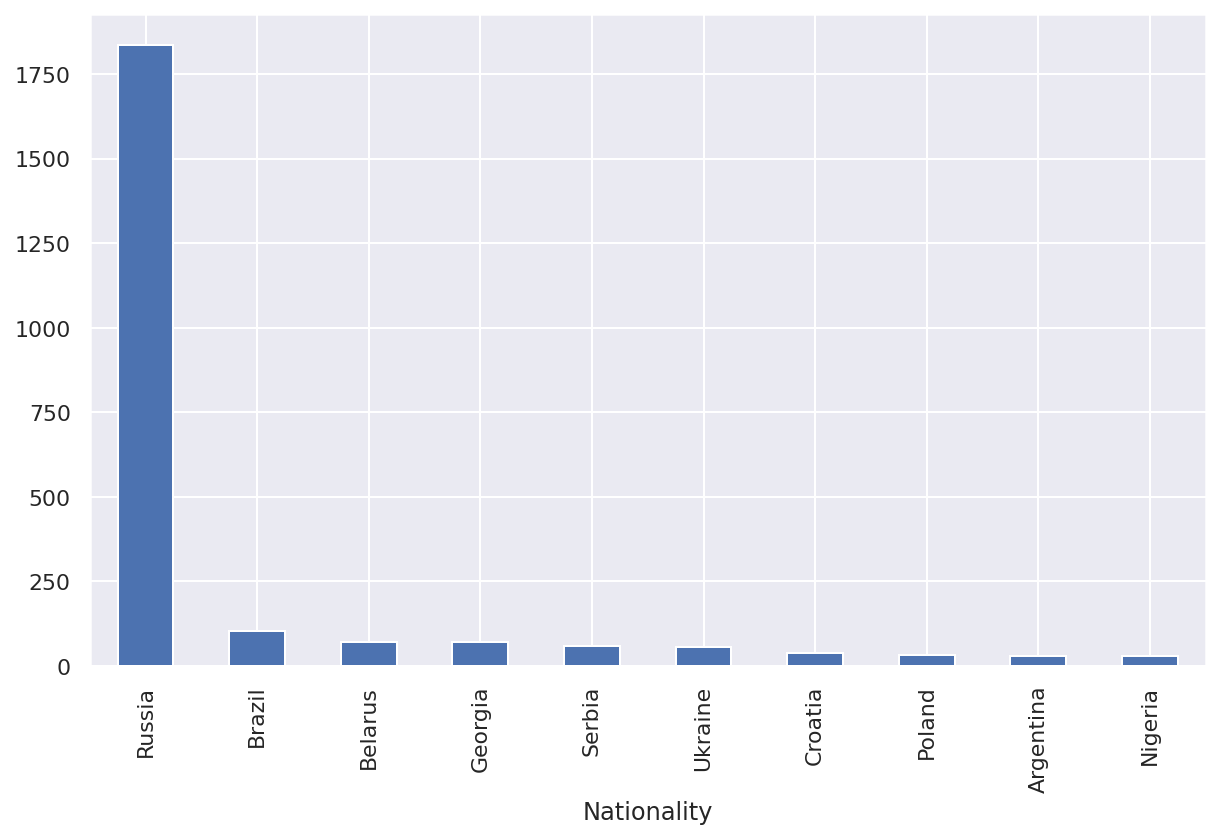

In [ ]:
df_nat.head(10).plot(kind='bar', figsize=(10, 6), legend = False)

####Result: 
Overall it can be seen that the distribution of national players across all RFPL clubs much higher than players of other nations.

##Prop 2

In [ ]:
df_ru_season = df[df['Nationality'] == 'Russia'].sort_values(by = 'Season')

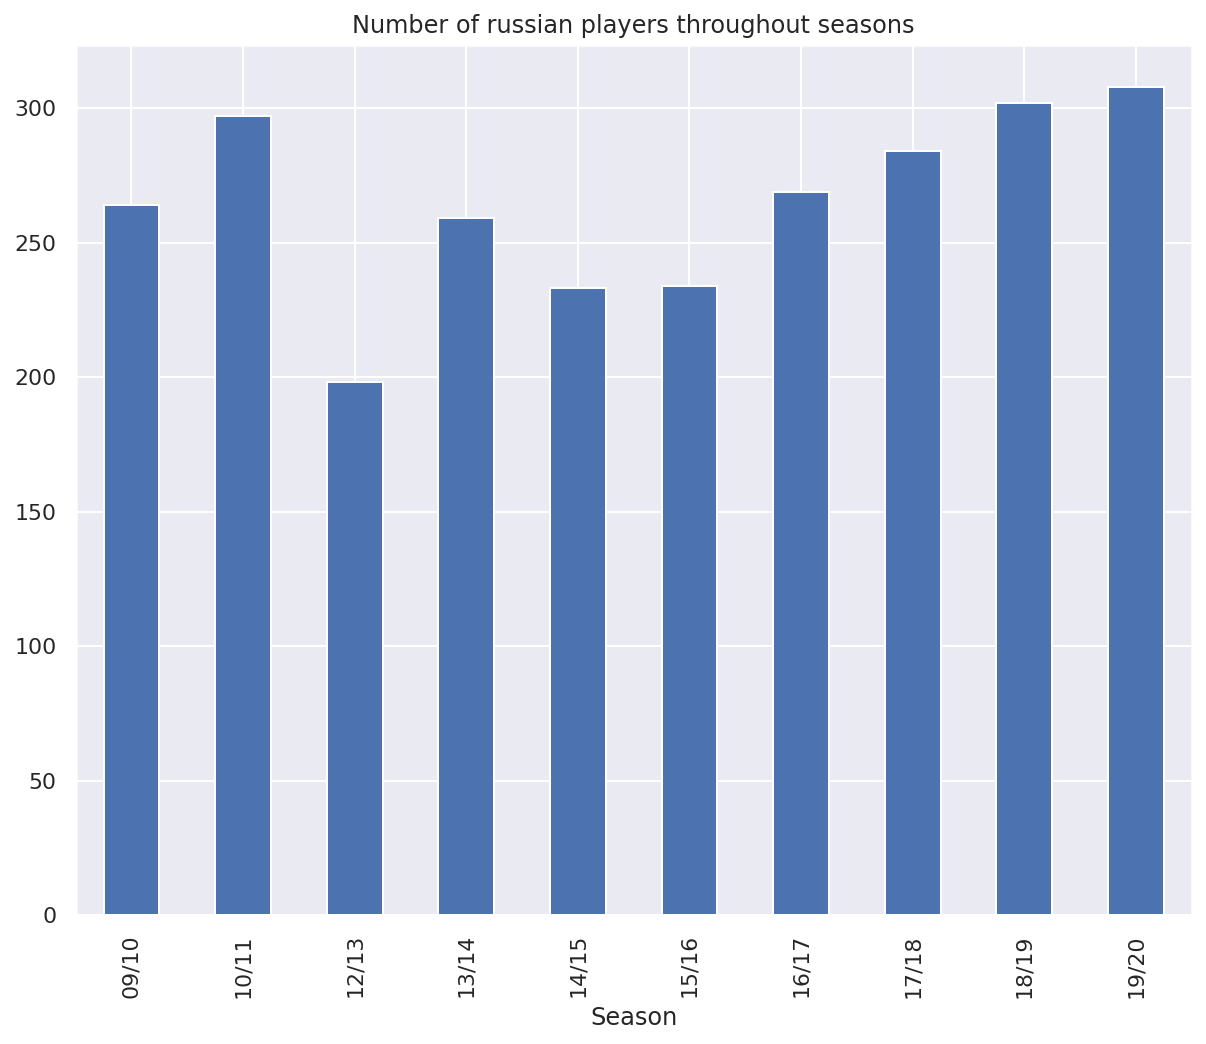

In [ ]:
df_ru_season.pivot_table(['Nationality'],
                         ['Season'], aggfunc='count').plot(kind='bar', legend = False, title = 'Number of russian players throughout seasons', figsize=(10, 8))

####Result: 
Comparing the first season in our dataset, the overall trend and the last season, we can say that the number of russian players increased.

##Prop 3

In [ ]:
cis = ['Armenia', 'Azerbaijan', 'Belarus', 'Kazakhstan', 'Kyrgyzstan', 'Moldova', 'Tajikistan', 'Uzbekistan']
cis_with_ru = ['Armenia', 'Azerbaijan', 'Belarus', 'Kazakhstan', 'Kyrgyzstan', 'Moldova', 'Tajikistan', 'Uzbekistan', 'Russia']

In [ ]:
df_cis = df[(df['Nationality'].isin(cis)) & (df['Club to'].isin(rus_clubs)) & (~df['Club from'].isin(rus_clubs))].reset_index(drop=True)
df_not_cis = df[~df['Nationality'].isin(cis_with_ru) & (df['Club to'].isin(rus_clubs)) & (~df['Club from'].isin(rus_clubs))].reset_index(drop=True)

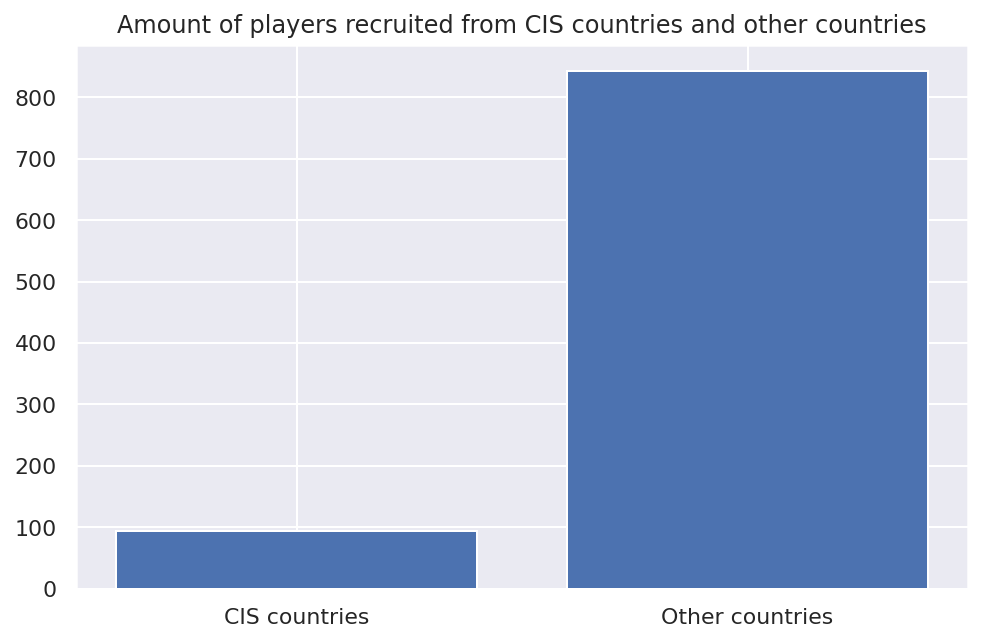

In [ ]:
x = np.arange(2)
vals = [len(df_cis), len(df_not_cis)]

plt.figure(figsize=(8,5))
plt.bar(x, vals)
plt.xticks(x, ('CIS countries', 'Other countries'))
plt.title('Amount of players recruited from CIS countries and other countries')
plt.show()

####Result:
Amount of players recruited from other countries is much higher than from CIS countries.

#Prop 4

In [ ]:
df_test = df.copy()
df_test.loc[(df_test['Nationality'].isin(eu)),'Nationality'] = 'Europe'
df_test.loc[(df_test['Nationality'].isin(asia)),'Nationality'] = 'Asia'
df_test.loc[(df_test['Nationality'].isin(africa)),'Nationality'] = 'Africa'
df_test.loc[(df_test['Nationality'].isin(na)),'Nationality'] = 'NA'
df_test.loc[(df_test['Nationality'].isin(sa)),'Nationality'] = 'SA'
df_test.loc[(df_test['Nationality'].isin(oc)),'Nationality'] = 'OC'
df_zen = df_test[(df_test['Club to'] == 'Zenit St. Petersburg') & (df_test['Nationality'] != 'Russia')].sort_values(by='Season')
df_cska = df_test[(df_test['Club to'] == 'CSKA Moscow') & (df_test['Nationality'] != 'Russia')].sort_values(by='Season')
df_loko = df_test[(df_test['Club to'] == 'Lokomotiv Moscow') & (df_test['Nationality'] != 'Russia')].sort_values(by='Season')
df_spar = df_test[(df_test['Club to'] == 'Spartak Moscow') & (df_test['Nationality'] != 'Russia')].sort_values(by='Season')

In [ ]:
df_fin_zen = df_zen.pivot_table(index='Season', 
                     columns='Nationality', 
                     values='Age',
                     fill_value=0, 
                     aggfunc='count')
df_fin_cska = df_cska.pivot_table(index='Season', 
                     columns='Nationality', 
                     values='Age',
                     fill_value=0, 
                     aggfunc='count')
df_fin_loko = df_loko.pivot_table(index='Season', 
                     columns='Nationality', 
                     values='Age',
                     fill_value=0, 
                     aggfunc='count')
df_fin_spar = df_spar.pivot_table(index='Season', 
                     columns='Nationality', 
                     values='Age',
                     fill_value=0, 
                     aggfunc='count')

Text(0.5, 1.0, 'Zenit St. Petersburg transfers')

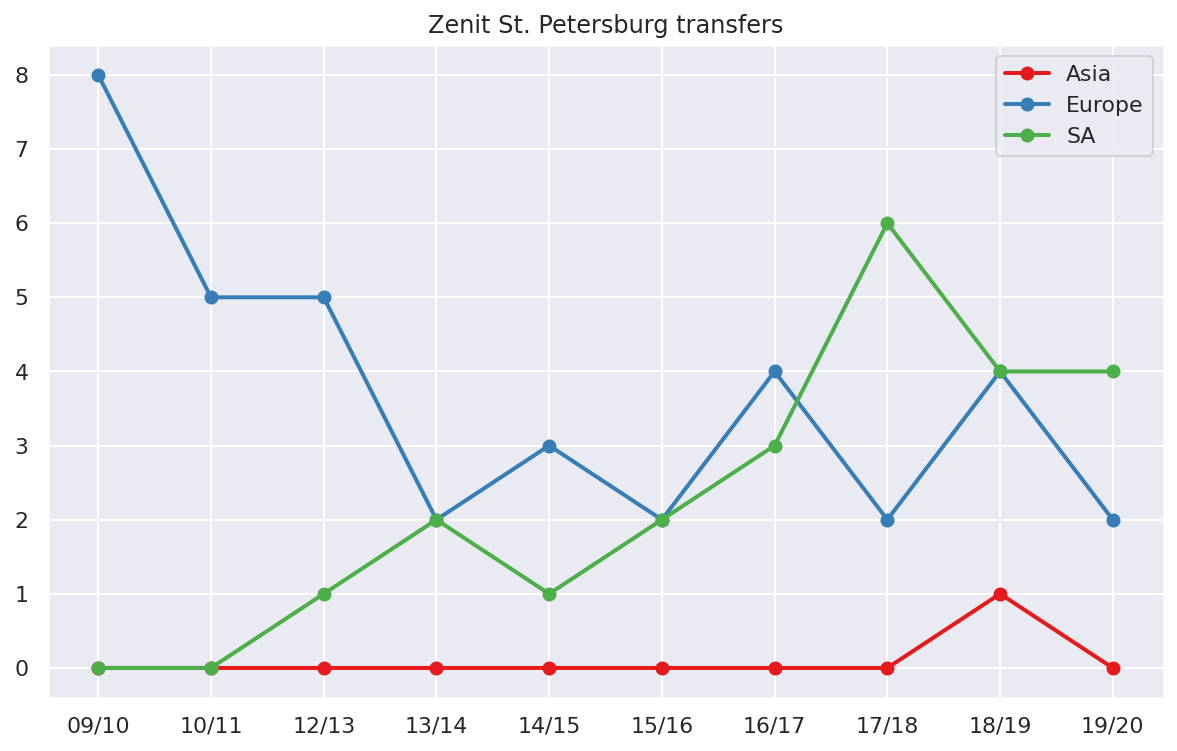

In [ ]:
palette = plt.get_cmap('Set1')
num=0
plt.figure(figsize=(10,6))
for column in df_fin_zen:
  plt.plot(df_fin_zen.index.tolist(), df_fin_zen[column], marker='o', color=palette(num), linewidth=2, alpha=1, label=column)
  num+=1
plt.legend(loc=1)
plt.title('Zenit St. Petersburg transfers')

Text(0.5, 1.0, 'CSKA Moscow transfers')

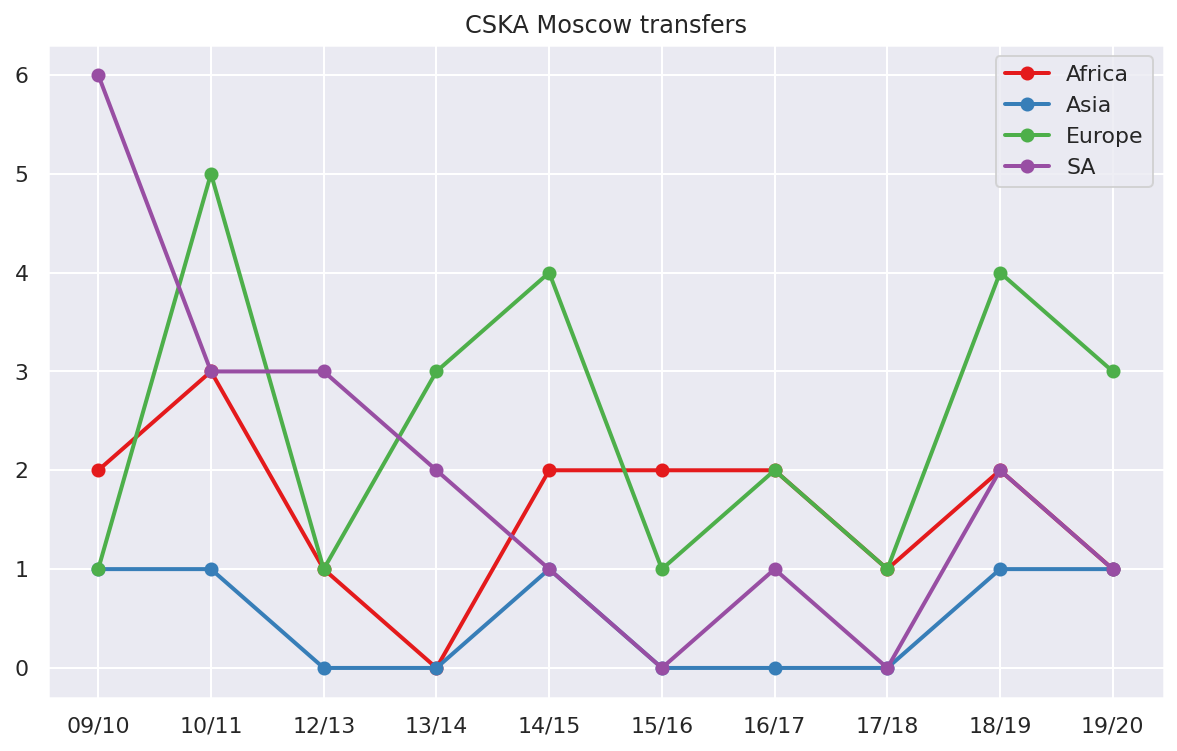

In [ ]:
palette = plt.get_cmap('Set1')
num=0
plt.figure(figsize=(10,6))
for column in df_fin_cska:
  plt.plot(df_fin_cska.index.tolist(), df_fin_cska[column], marker='o', color=palette(num), linewidth=2, alpha=1, label=column)
  num+=1
plt.legend(loc=1)
plt.title('CSKA Moscow transfers')

Text(0.5, 1.0, 'Lokomotiv Moscow transfers')

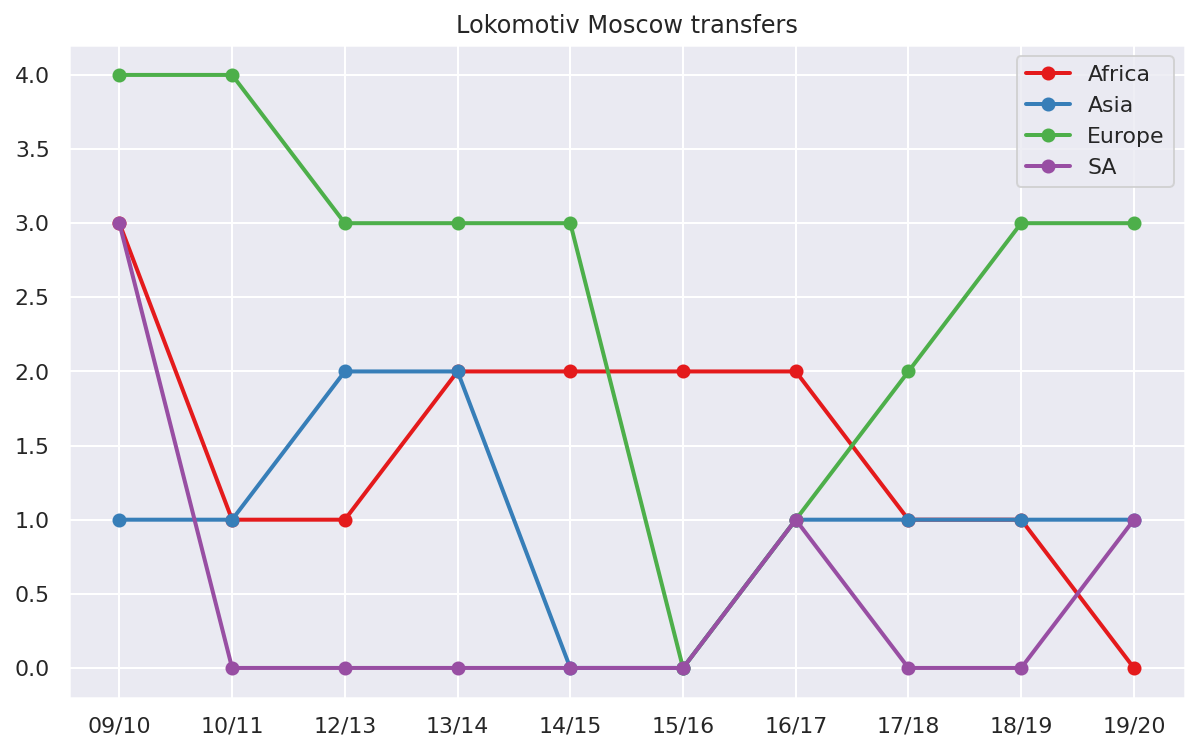

In [ ]:
palette = plt.get_cmap('Set1')
num=0
plt.figure(figsize=(10,6))
for column in df_fin_loko:
  plt.plot(df_fin_loko.index.tolist(), df_fin_loko[column], marker='o', color=palette(num), linewidth=2, alpha=1, label=column)
  num+=1
plt.legend(loc=1)
plt.title('Lokomotiv Moscow transfers')

Text(0.5, 1.0, 'Spartak Moscow transfers')

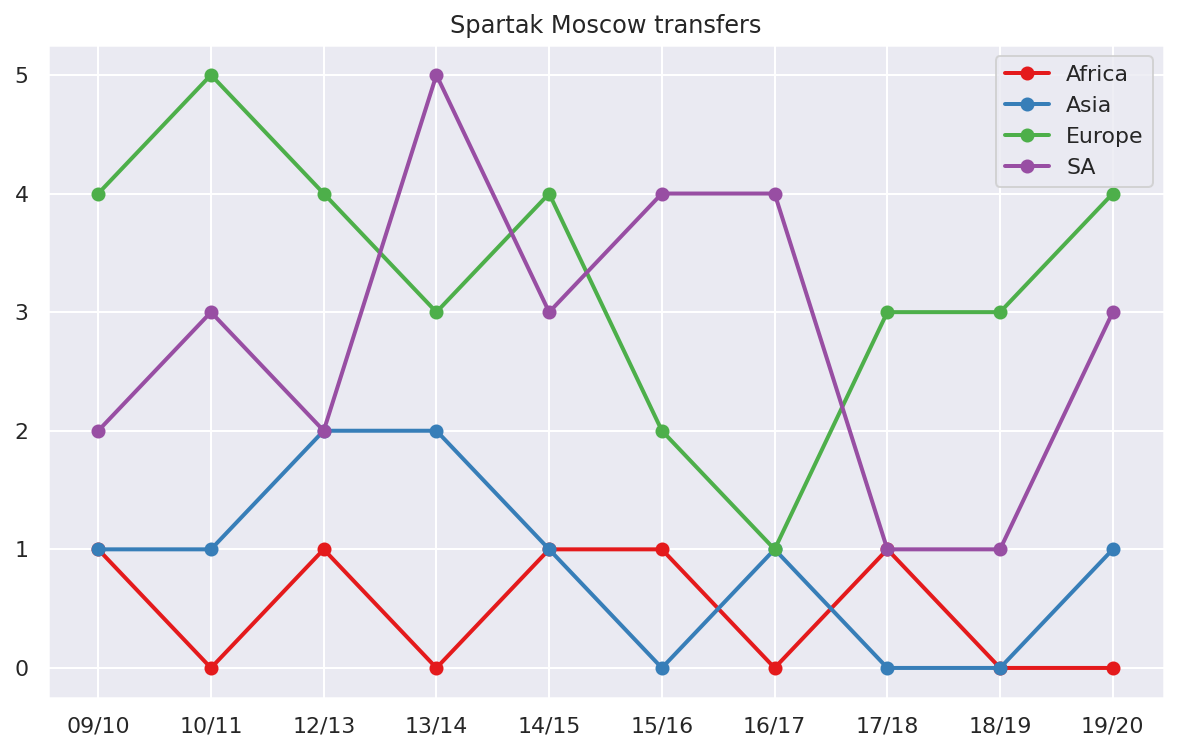

In [ ]:
palette = plt.get_cmap('Set1')
num=0
plt.figure(figsize=(10,6))
for column in df_fin_spar:
  plt.plot(df_fin_spar.index.tolist(), df_fin_spar[column], marker='o', color=palette(num), linewidth=2, alpha=1, label=column)
  num+=1
plt.legend(loc=1)
plt.title('Spartak Moscow transfers')

####Results:
Overall it can be seen that clubs prefer repeated transfers from specified regions.

##Prop 5

In [ ]:
ru = ['Russia']
df_without_ru = df[~df['Nationality'].isin(ru)].reset_index(drop=True)

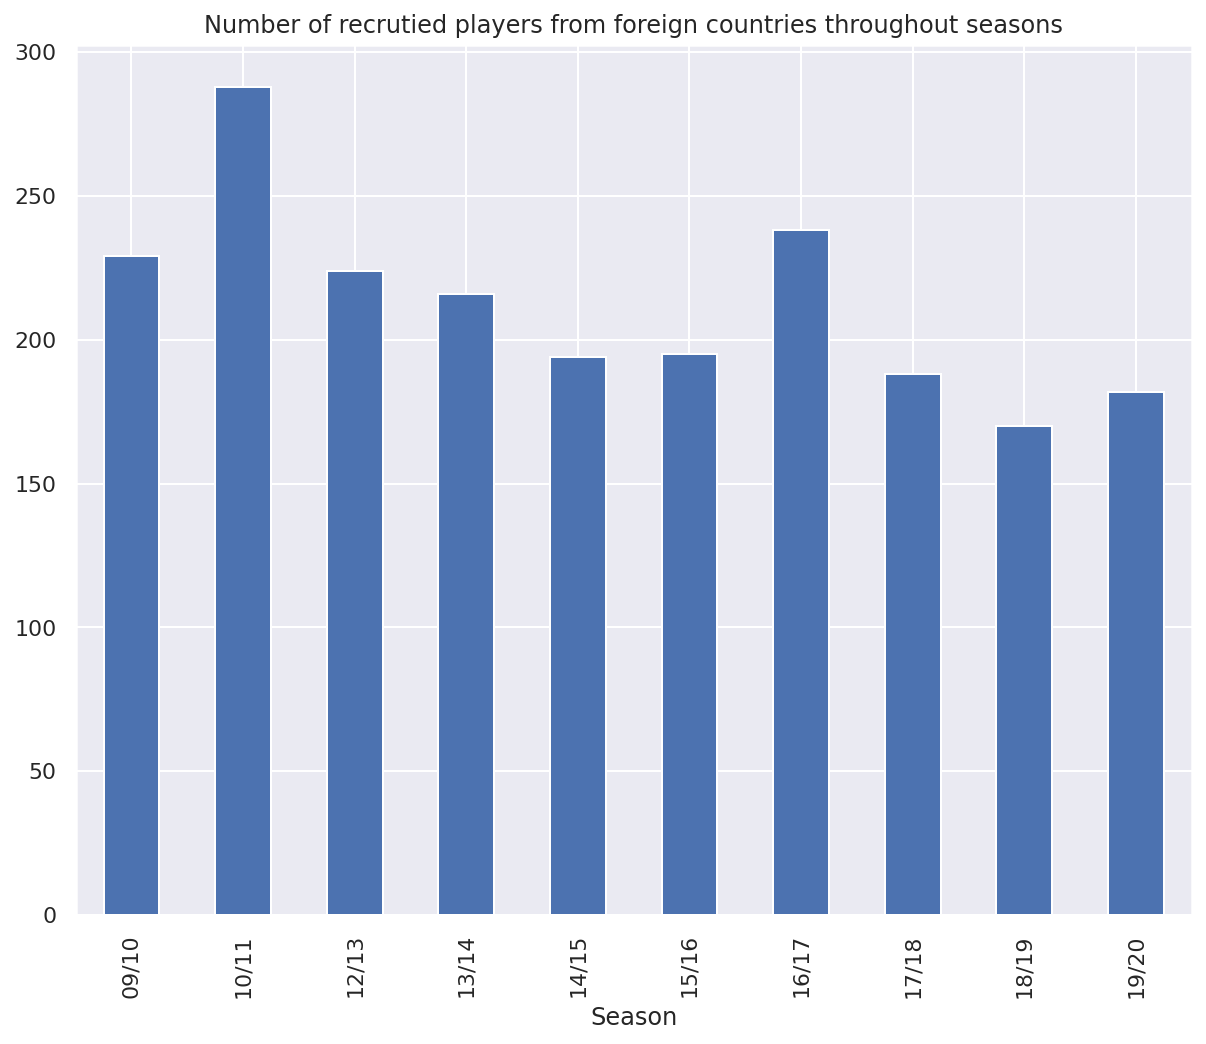

In [ ]:
df_without_ru.sort_values(by='Season').pivot_table(['Nationality'],
                         ['Season'], aggfunc='count').plot(kind='bar', legend = False, 
                                                           title = 'Number of recrutied players from foreign countries throughout seasons', figsize=(10, 8))

####Results:
We can say that recruitment of players from other countries got overall downward tendency.

##Prop 6

###Transfers

In [ ]:
df_rfpl_clubs = df.loc[(df['Club from'].isin(rus_clubs)) & (df['Club to'].isin(rus_clubs))& 
                       (df['Transfer type'] != 'Loan ') & (~df['Transfer type'].astype(str).str.startswith('End'))].sort_values(by='Season').reset_index(drop=True)

In [ ]:
"""Creating weights df"""
df_weights = df_rfpl_clubs.groupby('Club to').count().sort_values(by='Age')['Age']

# df_weights_list = list(zip(df_weights.index.tolist(), df_weights.values.tolist()))
# result = []
# for v in df_rfpl_clubs['Club to']:
#   for i in range(len(df_weights_list)):
#     if v == df_weights_list[i][0]:
#       result.append(df_weights_list[i][1])
# df_rfpl_clubs['Weight'] = result

In [ ]:
"""Creating graph and weights for nodes"""
G = nx.from_pandas_edgelist(df_rfpl_clubs, 'Club from', 'Club to', create_using=nx.DiGraph())

carac = pd.DataFrame({'ID':df_weights.index.tolist(), 'MyValue':df_weights.values.tolist()})
carac = carac.set_index('ID')
carac = carac.reindex(G.nodes())

In [ ]:
"""Creating weights for edges"""
for key,val in nx.all_pairs_node_connectivity(G).items():
  for club, trans in val.items():
    for i,j,p in G.edges(data=True):
      if key == i and j == club:
        p['weight'] = trans

In [ ]:
"""Creating colors for edges"""
values = range(len(G.edges)) #this is based on the number of edges in the graph, use print len(g.edges()) to determine this
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=plt.cm.Greys)
colorList = []

for i in range(len(G.edges)):
    colorVal = scalarMap.to_rgba(values[i])
    colorList.append(colorVal)

Text(0.5, 1.0, 'Network of transfers across RFPL')

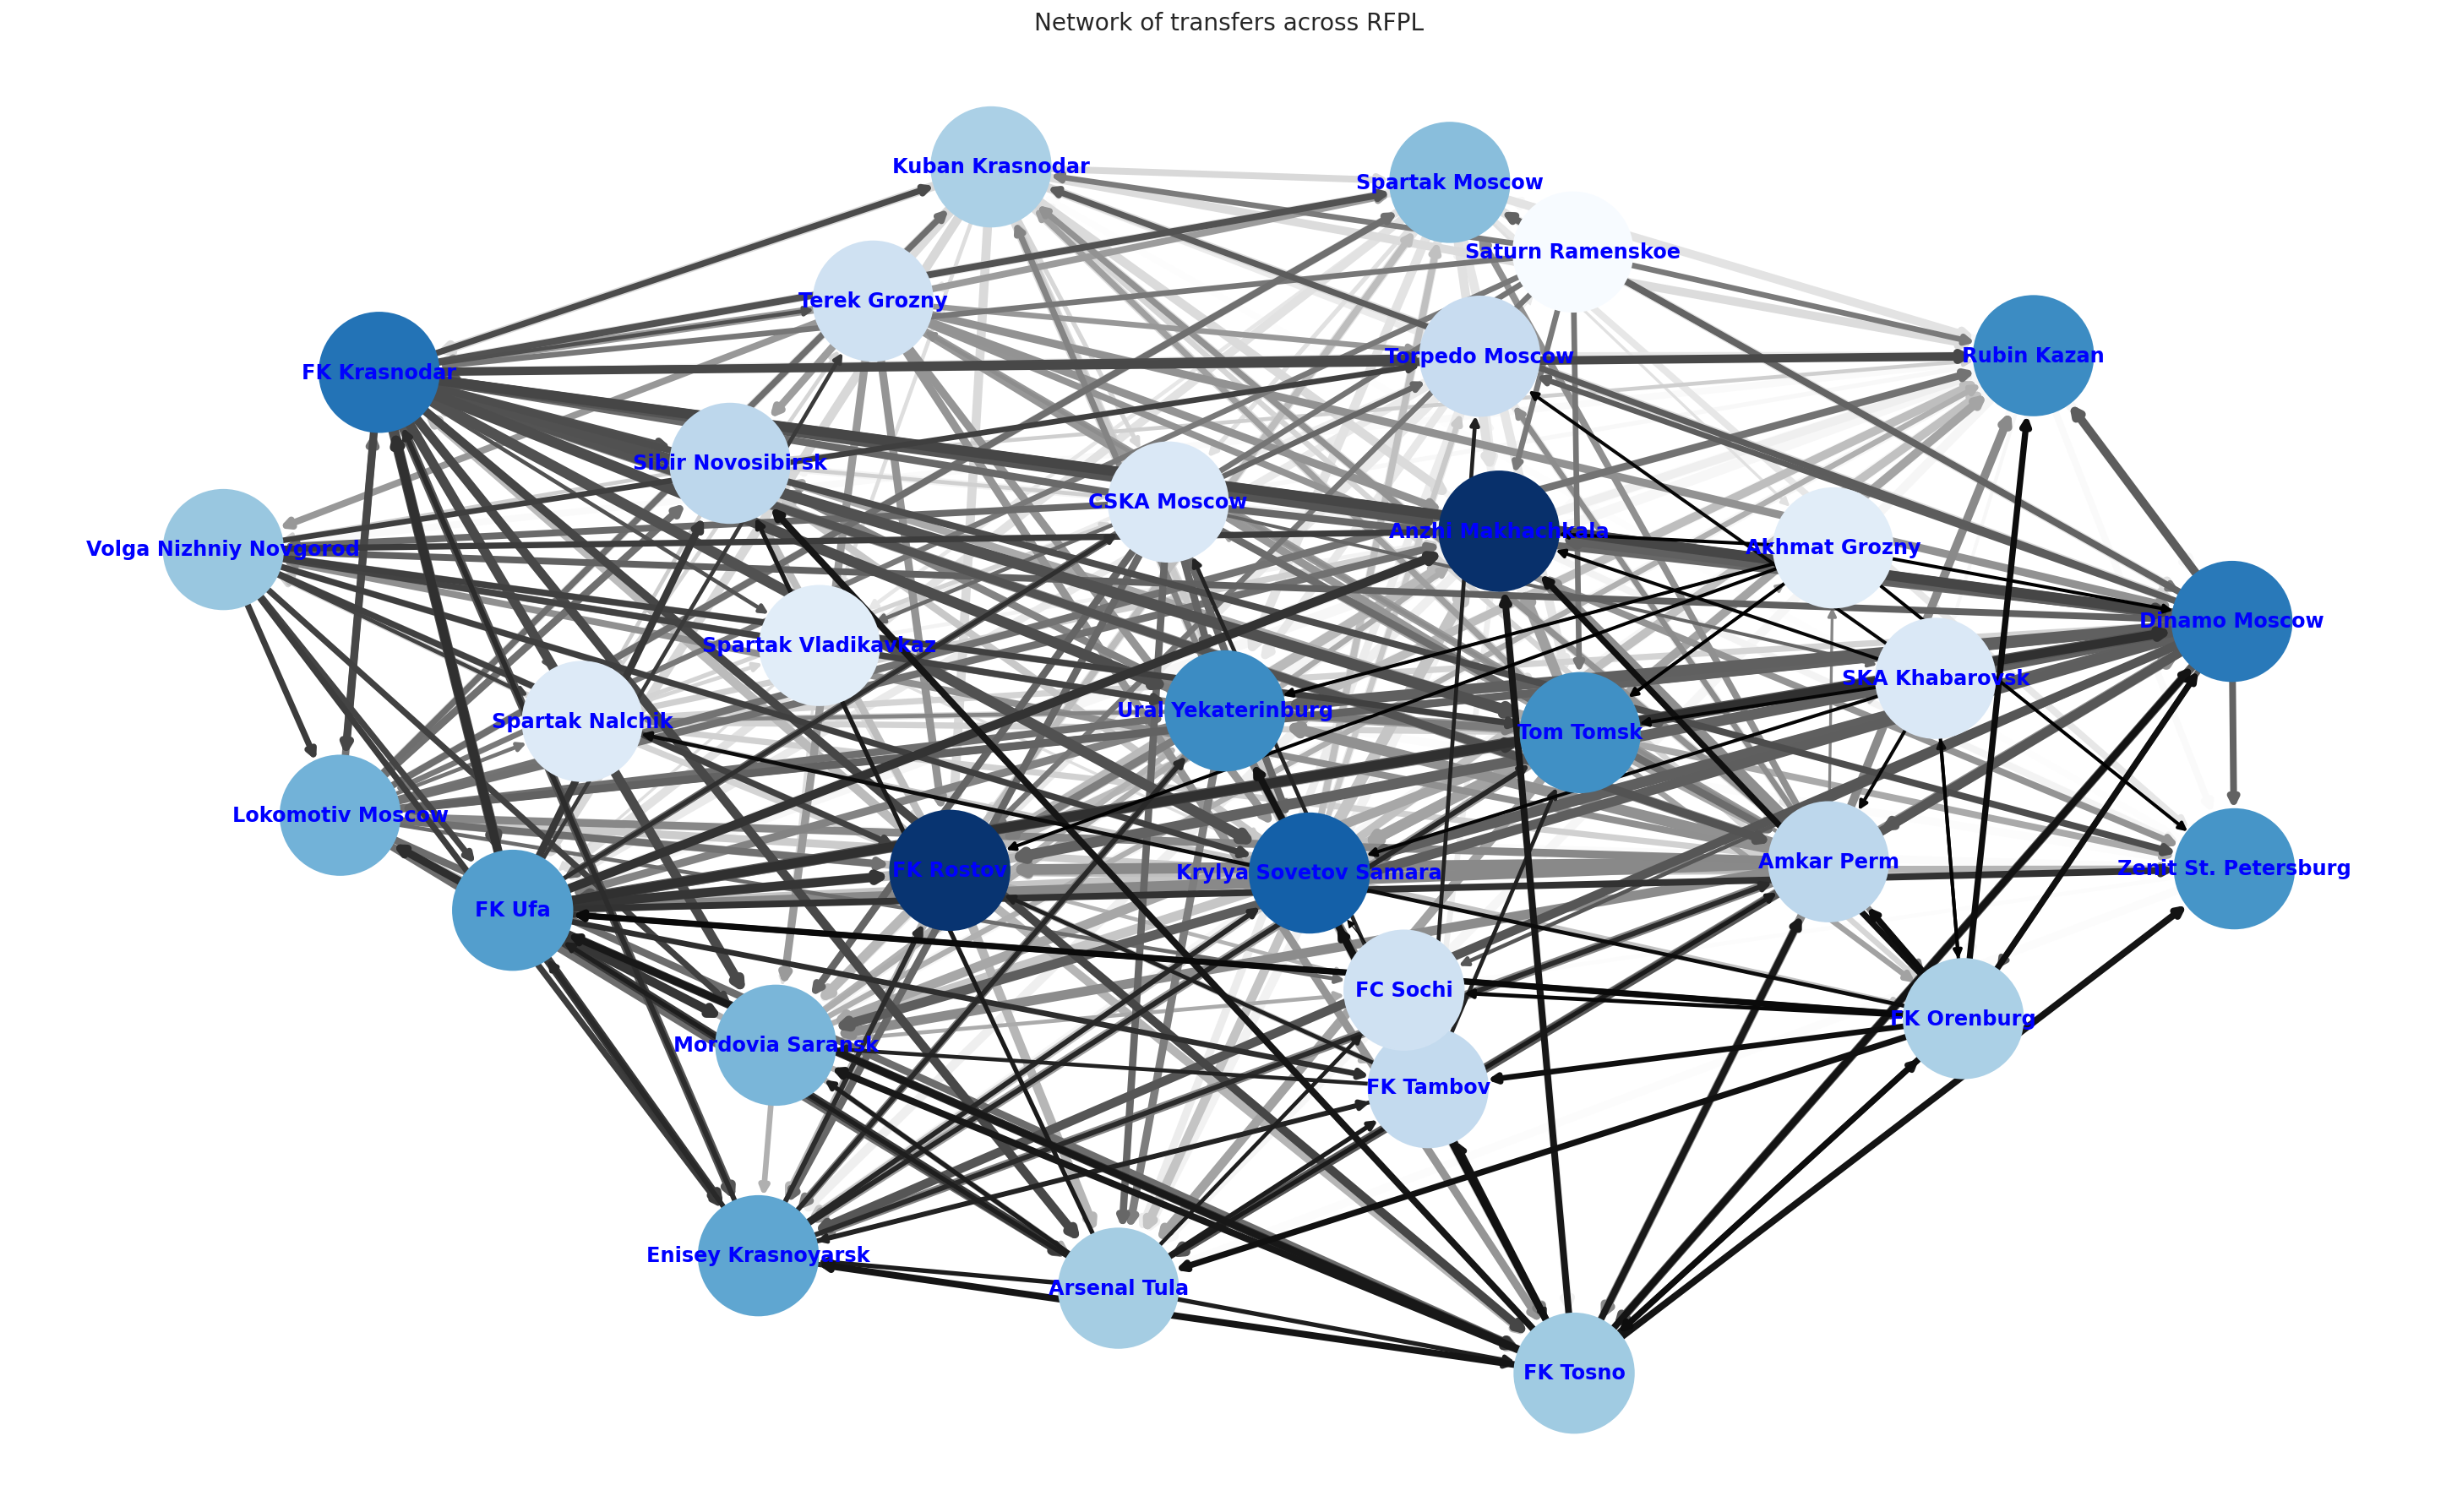

In [ ]:
"""Ploting graph"""
plt.figure(figsize=(20,12))
nx.draw_kamada_kawai(G, with_labels=True, node_size=5000, alpha=1, font_weight='bold', font_size=12, font_color='Blue', 
                     node_color=carac['MyValue'], cmap=plt.cm.Blues, width=[d['weight']/3 for _, _, d in G.edges(data=True)], edge_color = colorList)
plt.title('Network of transfers across RFPL', fontsize = 14)

In [ ]:
sorted(G.out_degree, key=lambda k: k[1], reverse=True)

[('Anzhi Makhachkala', 25),
 ('Krylya Sovetov Samara', 23),
 ('Dinamo Moscow', 21),
 ('FK Krasnodar', 21),
 ('Tom Tomsk', 19),
 ('Amkar Perm', 19),
 ('Rubin Kazan', 18),
 ('FK Rostov', 18),
 ('Spartak Moscow', 16),
 ('Kuban Krasnodar', 16),
 ('FK Ufa', 16),
 ('Zenit St. Petersburg', 14),
 ('Torpedo Moscow', 14),
 ('Terek Grozny', 14),
 ('Ural Yekaterinburg', 14),
 ('Lokomotiv Moscow', 13),
 ('CSKA Moscow', 13),
 ('FK Tosno', 12),
 ('Spartak Nalchik', 11),
 ('Volga Nizhniy Novgorod', 11),
 ('FK Orenburg', 11),
 ('Mordovia Saransk', 10),
 ('Saturn Ramenskoe', 10),
 ('Enisey Krasnoyarsk', 9),
 ('Arsenal Tula', 8),
 ('Sibir Novosibirsk', 7),
 ('FK Tambov', 7),
 ('SKA Khabarovsk', 6),
 ('Akhmat Grozny', 6),
 ('Spartak Vladikavkaz', 5),
 ('FC Sochi', 2)]

In [ ]:
top_loans = []
for i in G.edges(data=True):
  for j in df_weights[-5:].index.tolist():
    if i[1] == j:
      top_loans.append(i)

top_loans = [list(i) for i in top_loans]
for i in top_loans:
  i[2] = sum(i[2].values())

top_loans = sorted(top_loans, key=lambda k: (k[1], k[2]), reverse=True)

In [ ]:
kryl = pd.DataFrame({'Club': [i[0] for i in top_loans[0:5]], 'Number of transfers': [i[2] for i in top_loans[0:5]]}).sort_values(by='Number of transfers', ascending = True)
kryl = kryl.set_index('Club')
anzi = pd.DataFrame({'Club': [i[0] for i in top_loans[78:83]], 'Number of transfers': [i[2] for i in top_loans[78:83]]}).sort_values(by='Number of transfers', ascending = True)
anzi = anzi.set_index('Club')
rost = pd.DataFrame({'Club': [i[0] for i in top_loans[19:24]], 'Number of transfers': [i[2] for i in top_loans[19:24]]}).sort_values(by='Number of transfers', ascending = True)
rost = rost.set_index('Club')
kras = pd.DataFrame({'Club': [i[0] for i in top_loans[39:44]], 'Number of transfers': [i[2] for i in top_loans[39:44]]}).sort_values(by='Number of transfers', ascending = True)
kras = kras.set_index('Club')
din = pd.DataFrame({'Club': [i[0] for i in top_loans[58:63]], 'Number of transfers': [i[2] for i in top_loans[58:63]]}).sort_values(by='Number of transfers', ascending = True)
din = din.set_index('Club')

Text(0.5, 0, '')

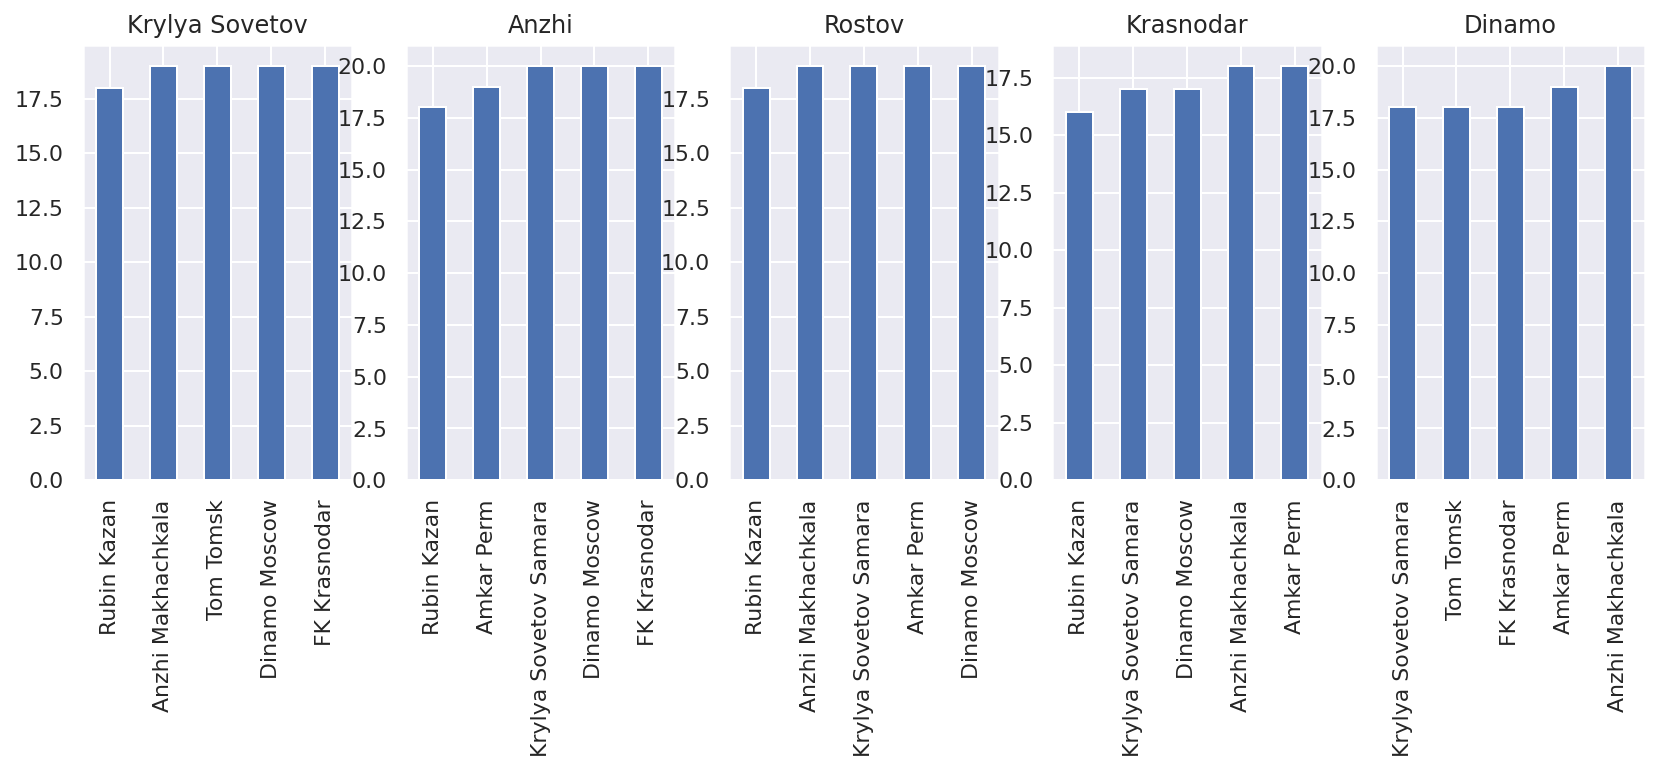

In [ ]:
f,ax = plt.subplots(1,5, figsize=(14, 4))
kryl.plot(kind = 'bar', legend = False, ax=ax[0], title = 'Krylya Sovetov')
anzi.plot(kind = 'bar', legend = False, ax=ax[1], title = 'Anzhi')
rost.plot(kind = 'bar', legend = False, ax=ax[2], title = 'Rostov')
kras.plot(kind = 'bar', legend = False, ax=ax[3], title = 'Krasnodar')
din.plot(kind = 'bar', legend = False, ax=ax[4], title = 'Dinamo')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('')
ax[3].set_xlabel('')
ax[4].set_xlabel('')

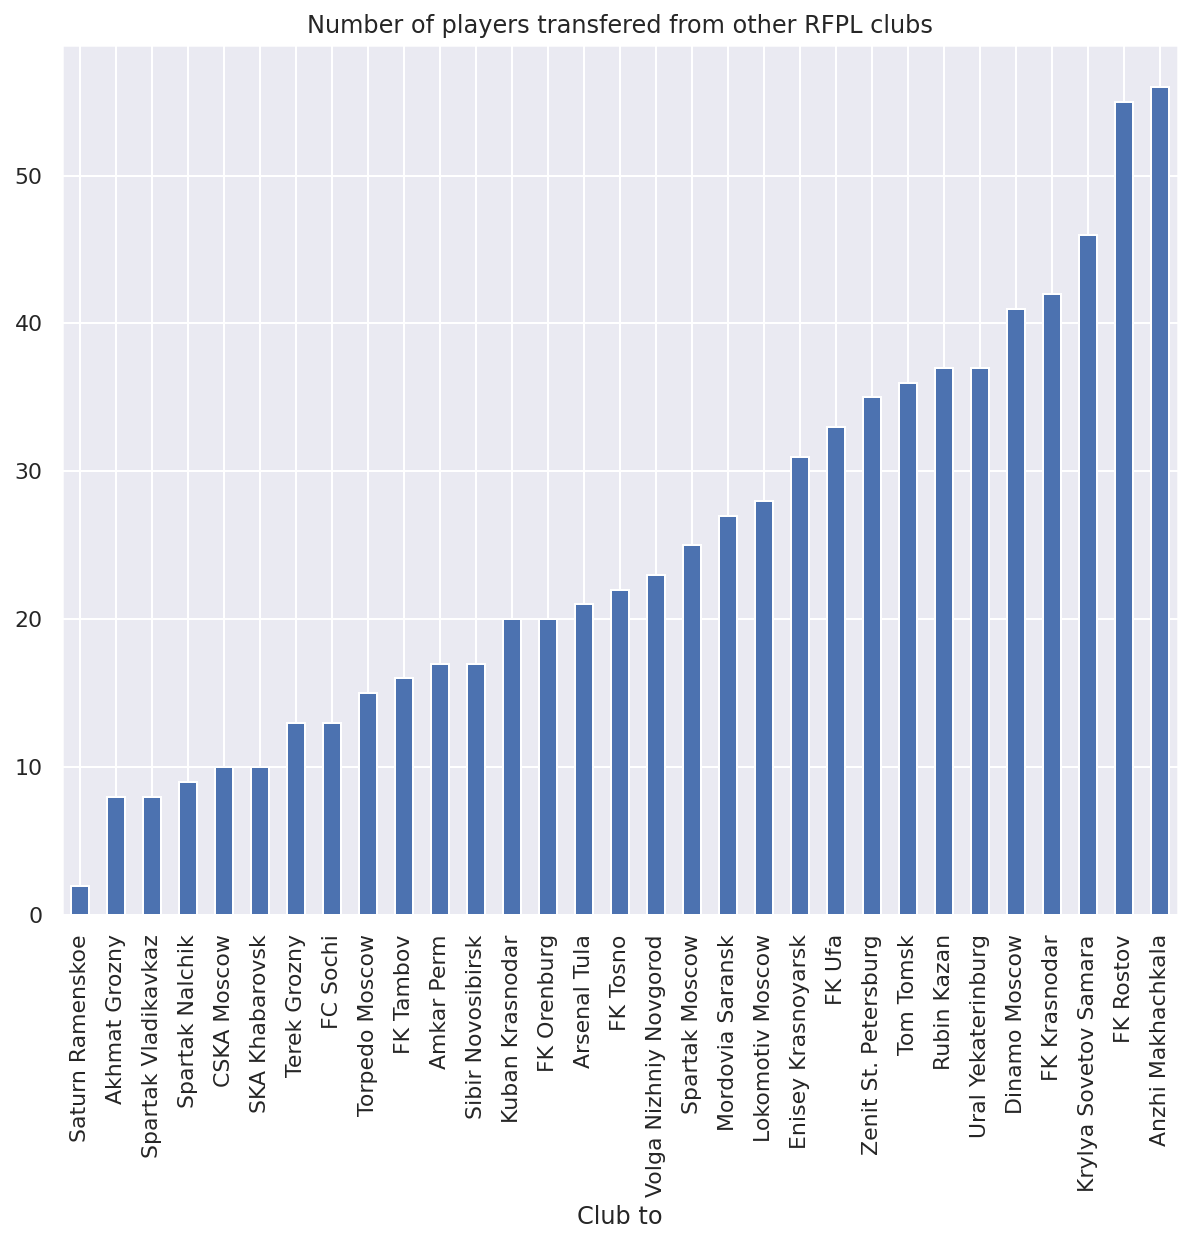

In [ ]:
df_weights.plot(kind='bar', legend = False, title = 'Number of players transfered from other RFPL clubs', figsize=(10, 8))

In [ ]:
df_rfpl_clubs_acad = df.loc[(df['Club to'].isin(rus_clubs))& 
                       (df['Transfer type'] == 'Academy')].sort_values(by='Season').reset_index(drop=True)

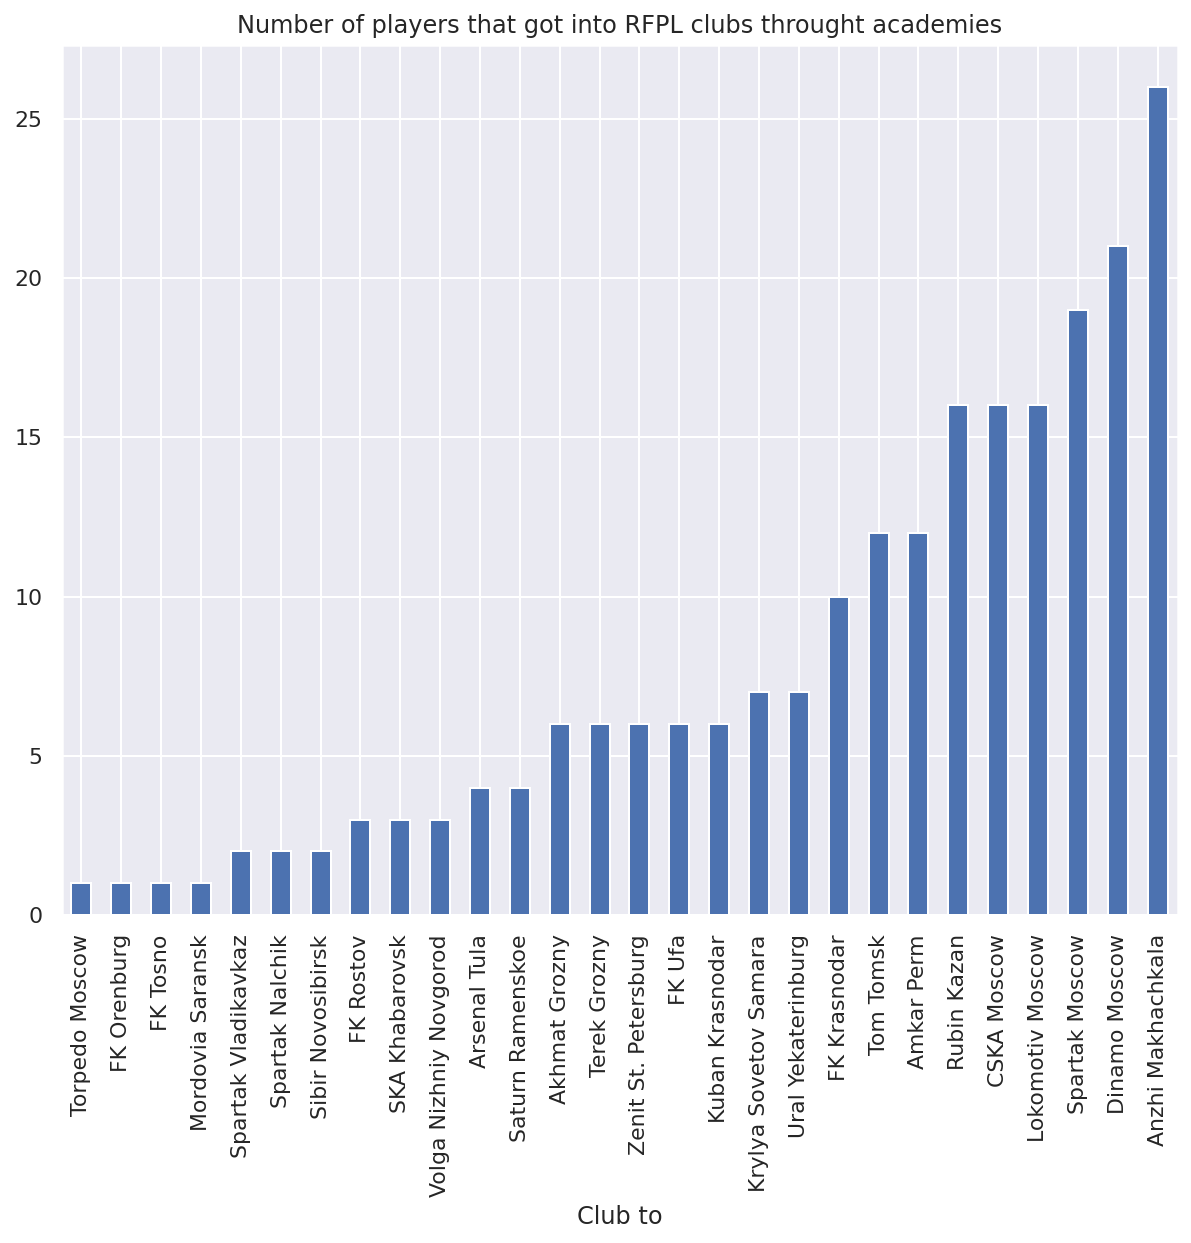

In [ ]:
df_rfpl_clubs_acad.groupby('Club to').count().sort_values(by='Age')['Age'].plot(kind='bar', legend = False, 
                                                                                title = 'Number of players that got into RFPL clubs throught academies', figsize=(10, 8))

###Loans

In [ ]:
df_rfpl_clubs_loans = df.loc[(df['Club from'].isin(rus_clubs)) & (df['Club to'].isin(rus_clubs))& 
                       (df['Transfer type'] == 'Loan ')].sort_values(by='Season').reset_index(drop=True)

In [ ]:
"""Doing the same as for transfer network"""
df_weights_loan = df_rfpl_clubs_loans.groupby('Club to').count().sort_values(by='Age')['Age']

# df_weights_list_loan = list(zip(df_weights_loan.index.tolist(), df_weights_loan.values.tolist()))
# result = []
# for v in df_rfpl_clubs_loans['Club to']:
#   for i in range(len(df_weights_list_loan)):
#     if v == df_weights_list_loan[i][0]:
#       result.append(df_weights_list_loan[i][1])
# df_rfpl_clubs_loans['Weight'] = result

In [ ]:
G_2 = nx.from_pandas_edgelist(df_rfpl_clubs_loans, 'Club from', 'Club to', create_using=nx.DiGraph())
carac_2 = pd.DataFrame({'ID':df_weights_loan.index.tolist(), 'MyValue':df_weights_loan.values.tolist()})
carac_2 = carac_2.set_index('ID')
carac_2 = carac_2.reindex(G_2.nodes())

In [ ]:
for key,val in nx.all_pairs_node_connectivity(G_2).items():
  for club, trans in val.items():
    for i,j,p in G_2.edges(data=True):
      if key == i and j == club:
        p['weight'] = trans

In [ ]:
values = range(len(G_2.edges)) #this is based on the number of edges in the graph, use print len(g.edges()) to determine this
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=plt.cm.Greys)
colorList = []

for i in range(len(G_2.edges)):
    colorVal = scalarMap.to_rgba(values[i])
    colorList.append(colorVal)

Text(0.5, 1.0, 'Network of loans across RFPL')

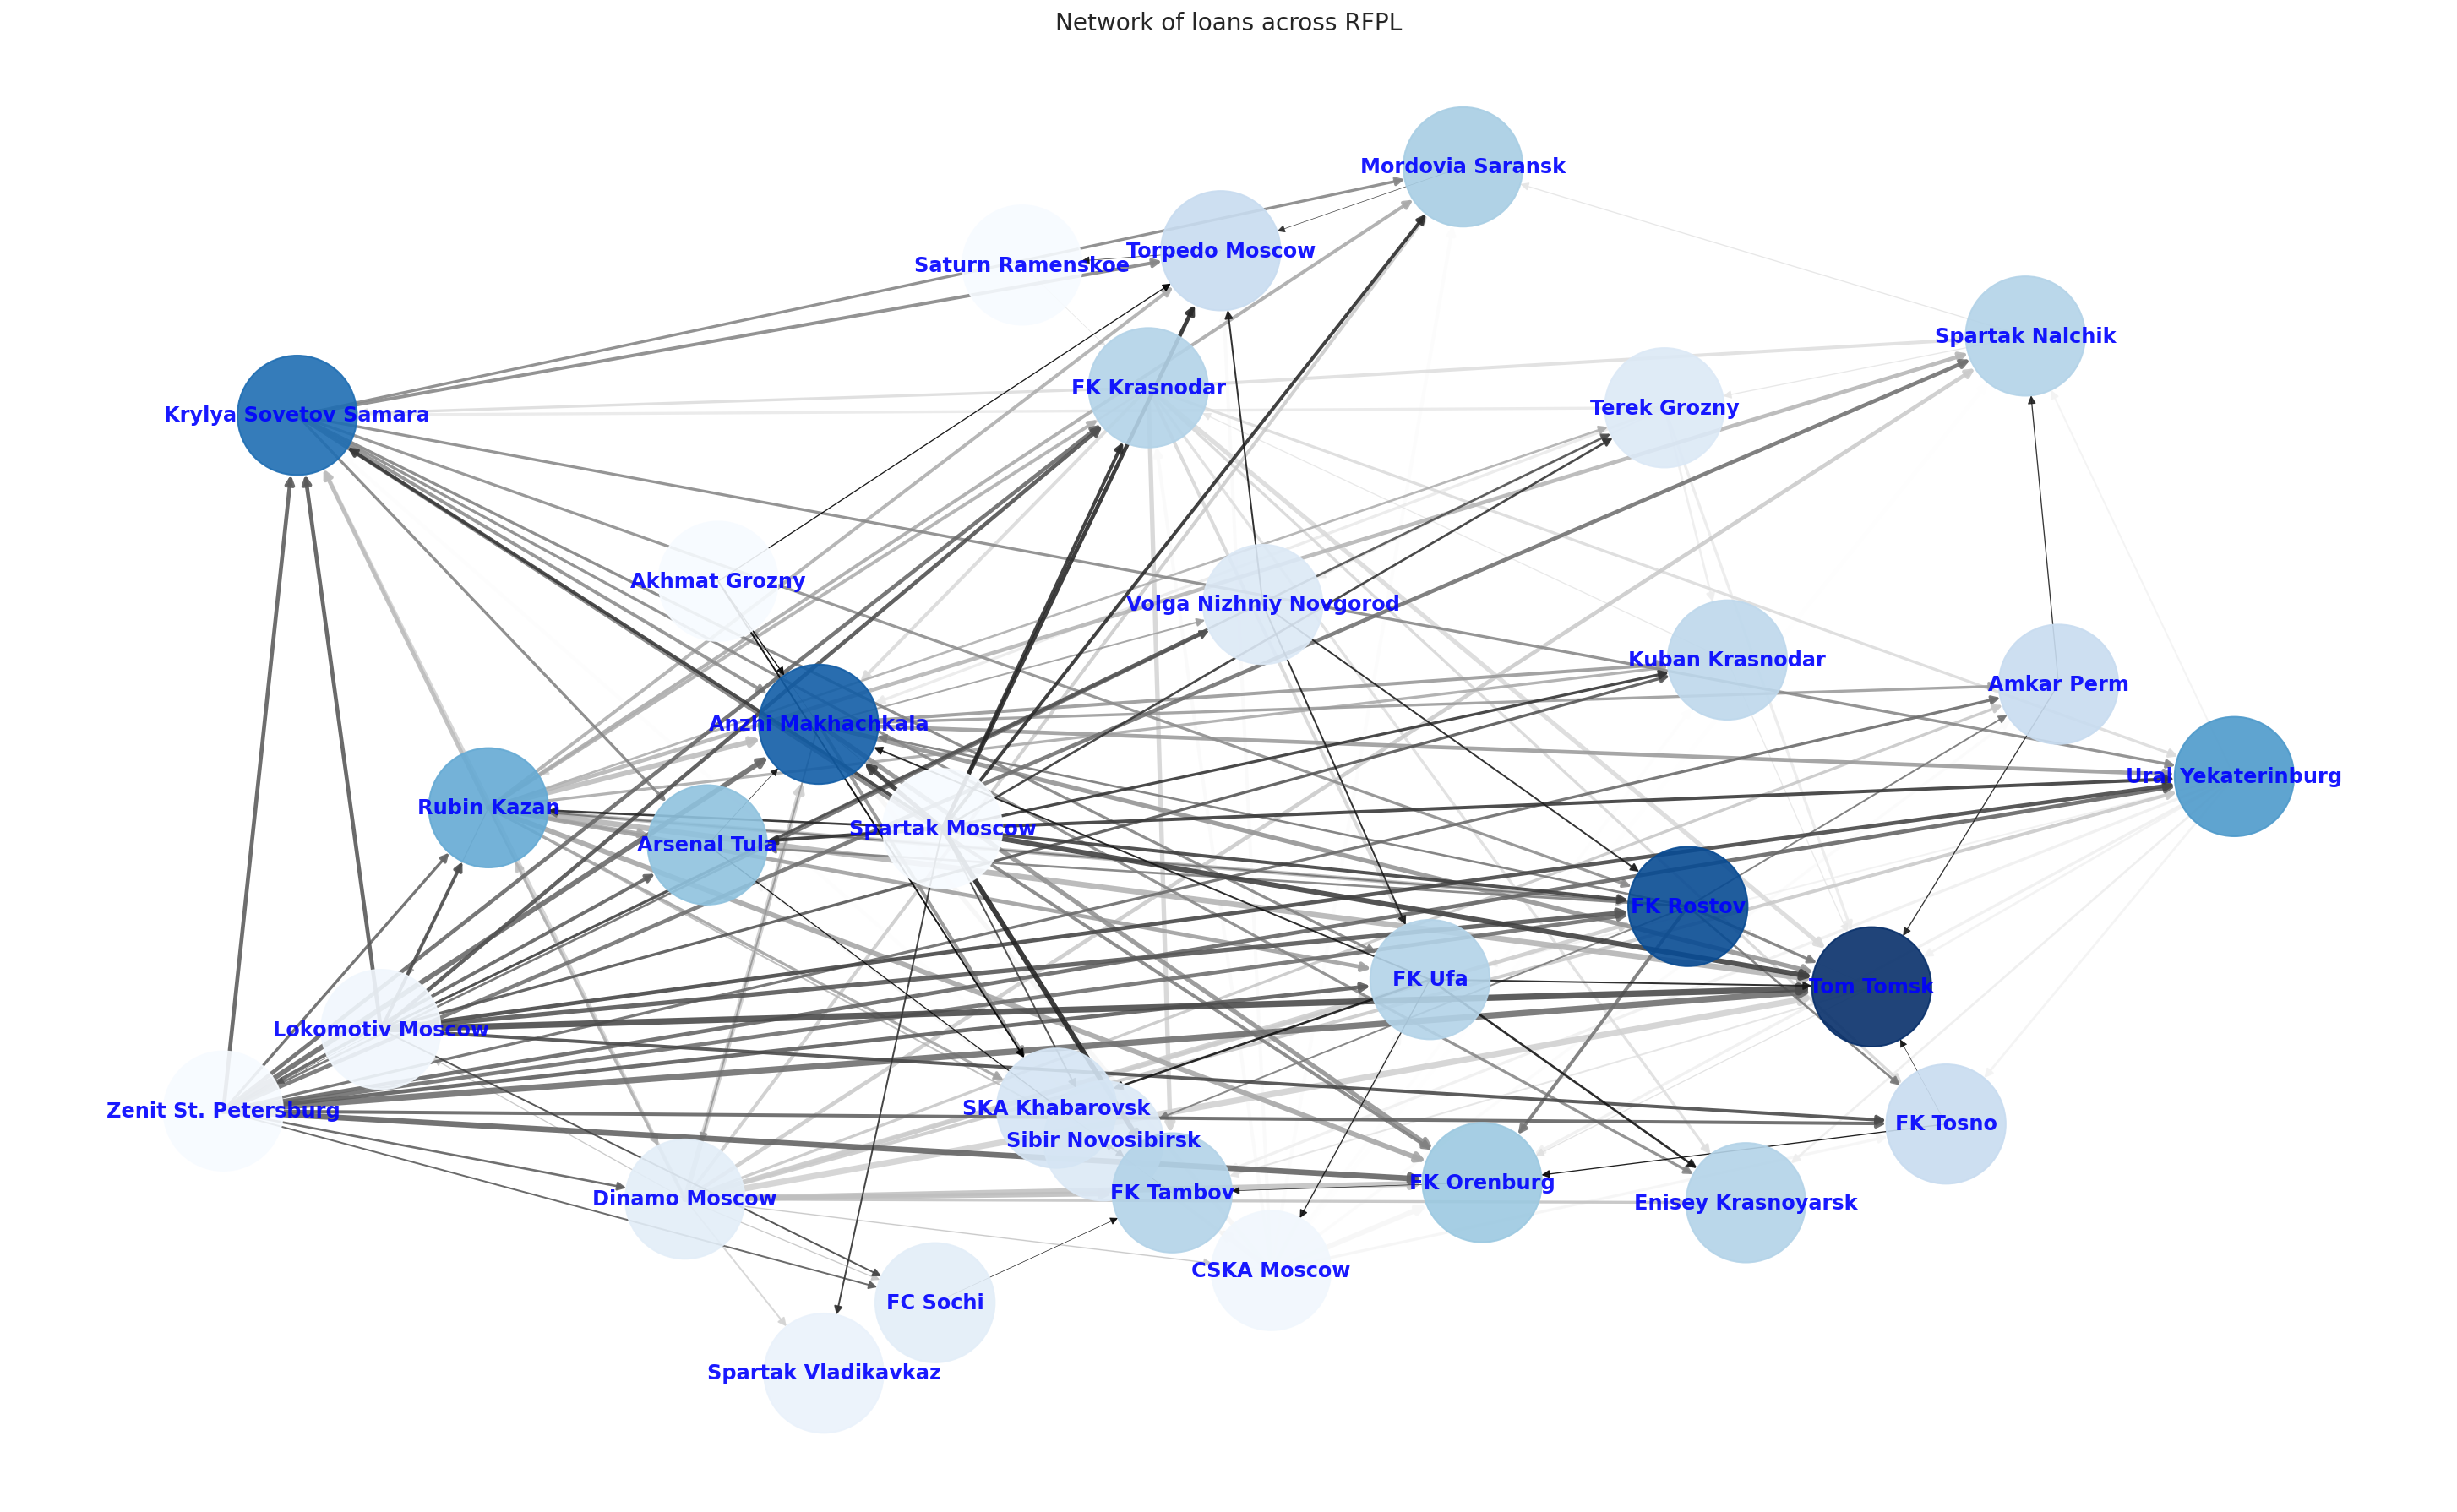

In [ ]:
plt.figure(figsize=(20,12))
nx.draw_kamada_kawai(G_2, with_labels=True, node_size=5000, alpha=0.9, font_weight='bold', font_size=12, font_color='Blue', 
                     node_color=carac_2['MyValue'], cmap=plt.cm.Blues, width=[d['weight']/3 for _, _, d in G_2.edges(data=True)], edge_color = colorList)
plt.title('Network of loans across RFPL', fontsize = 14)

In [ ]:
sorted(G_2.out_degree, key=lambda k: k[1], reverse=True)

[('CSKA Moscow', 17),
 ('Dinamo Moscow', 17),
 ('Rubin Kazan', 17),
 ('Zenit St. Petersburg', 16),
 ('Spartak Moscow', 15),
 ('Lokomotiv Moscow', 12),
 ('FK Krasnodar', 10),
 ('Anzhi Makhachkala', 10),
 ('Krylya Sovetov Samara', 9),
 ('FK Rostov', 8),
 ('Ural Yekaterinburg', 7),
 ('Terek Grozny', 5),
 ('FK Ufa', 5),
 ('Tom Tomsk', 3),
 ('Volga Nizhniy Novgorod', 3),
 ('Akhmat Grozny', 3),
 ('Kuban Krasnodar', 2),
 ('Spartak Nalchik', 2),
 ('Amkar Perm', 2),
 ('Arsenal Tula', 2),
 ('FK Tosno', 2),
 ('Saturn Ramenskoe', 1),
 ('Mordovia Saransk', 1),
 ('Torpedo Moscow', 1),
 ('FK Tambov', 1),
 ('FK Orenburg', 1),
 ('FC Sochi', 1),
 ('Spartak Vladikavkaz', 0),
 ('Sibir Novosibirsk', 0),
 ('Enisey Krasnoyarsk', 0),
 ('SKA Khabarovsk', 0)]

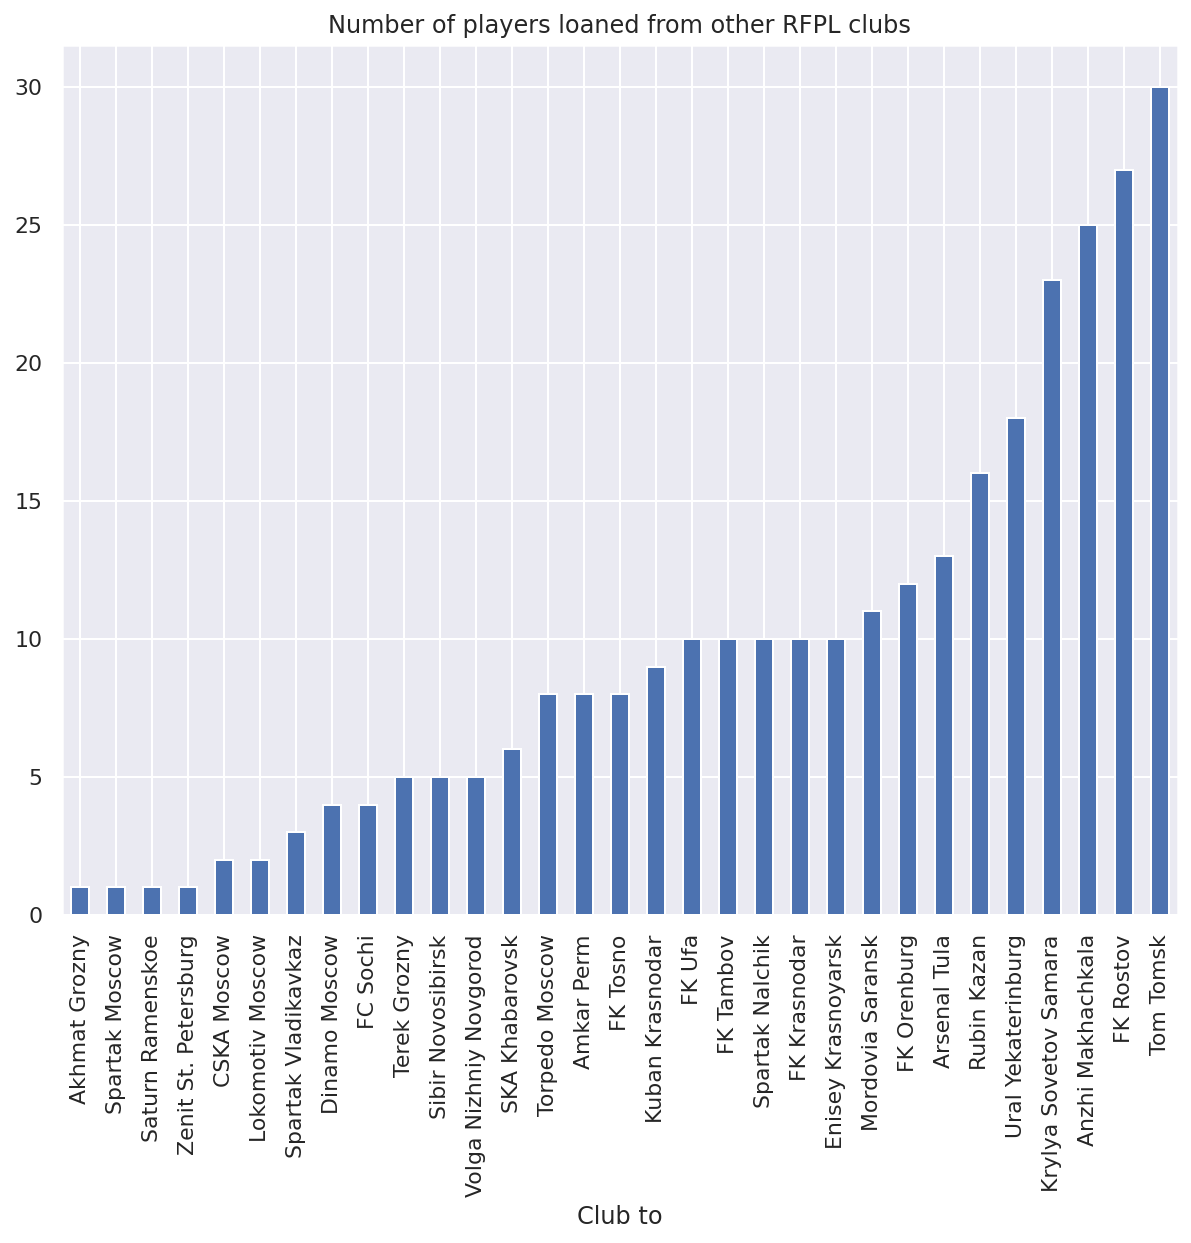

In [ ]:
df_weights_loan.plot(kind='bar', legend = False, title = 'Number of players loaned from other RFPL clubs', figsize=(10, 8))

In [ ]:
top_loans_2 = []
for i in G_2.edges(data=True):
  for j in df_weights_loan[-5:].index.tolist():
    if i[1] == j:
      top_loans_2.append(i)

top_loans_2 = [list(i) for i in top_loans_2]
for i in top_loans_2:
  i[2] = sum(i[2].values())

top_loans_2 = sorted(top_loans_2, key=lambda k: (k[1], k[2]), reverse=True)

In [ ]:
kryl_2 = pd.DataFrame({'Club': [i[0] for i in top_loans_2[22:27]], 'Number of transfers': [i[2] for i in top_loans_2[22:27]]}).sort_values(by='Number of transfers', ascending = True)
kryl_2 = kryl_2.set_index('Club')
anzi_2 = pd.DataFrame({'Club': [i[0] for i in top_loans_2[38:43]], 'Number of transfers': [i[2] for i in top_loans_2[38:43]]}).sort_values(by='Number of transfers', ascending = True)
anzi_2 = anzi_2.set_index('Club')
rost_2 = pd.DataFrame({'Club': [i[0] for i in top_loans_2[30:35]], 'Number of transfers': [i[2] for i in top_loans_2[30:35]]}).sort_values(by='Number of transfers', ascending = True)
rost_2 = rost_2.set_index('Club')
ural = pd.DataFrame({'Club': [i[0] for i in top_loans_2[0:5]], 'Number of transfers': [i[2] for i in top_loans_2[0:5]]}).sort_values(by='Number of transfers', ascending = True)
ural = ural.set_index('Club')
tom = pd.DataFrame({'Club': [i[0] for i in top_loans_2[8:13]], 'Number of transfers': [i[2] for i in top_loans_2[8:13]]}).sort_values(by='Number of transfers', ascending = True)
tom = tom.set_index('Club')

Text(0.5, 0, '')

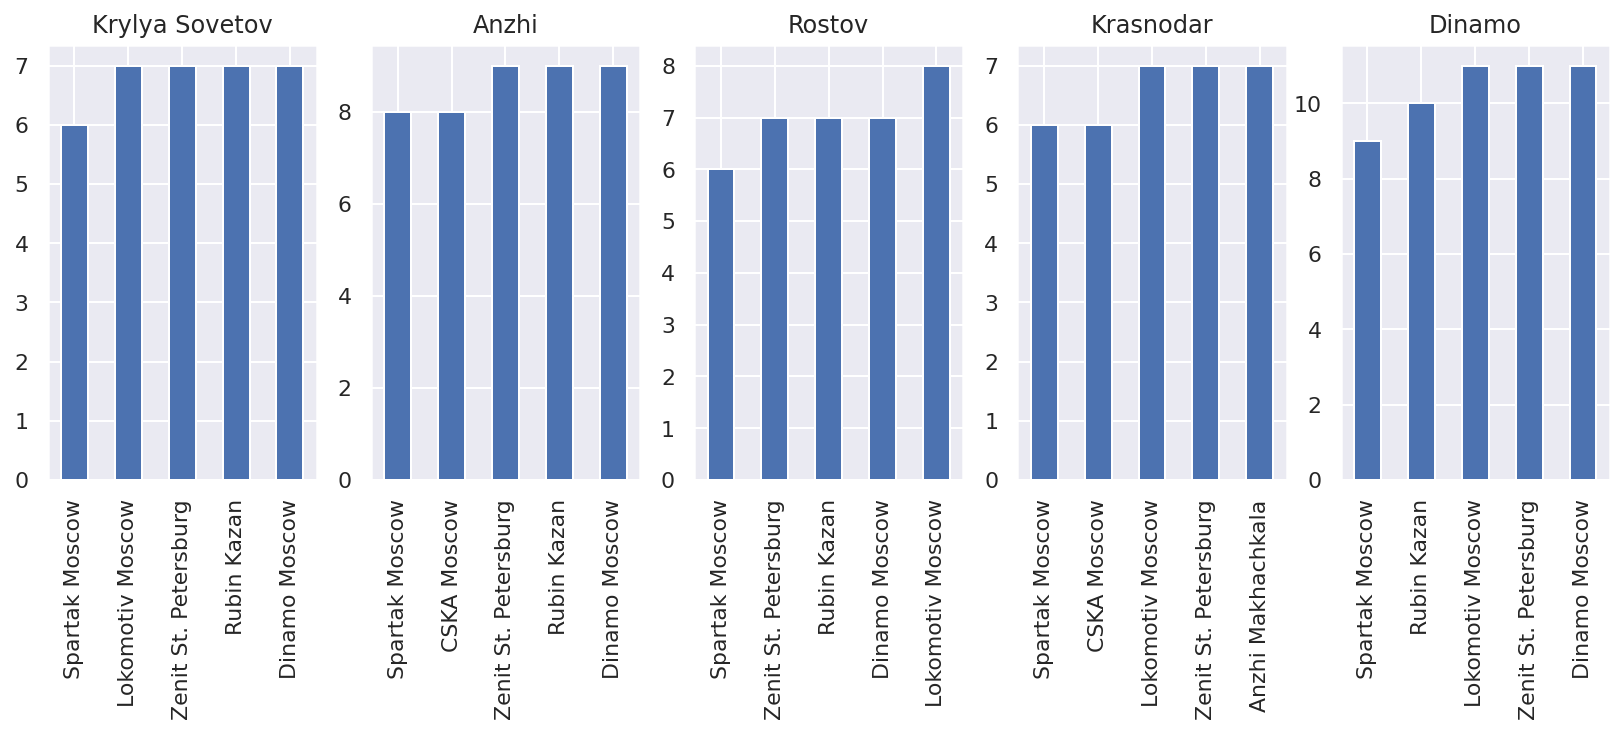

In [ ]:
f,ax = plt.subplots(1,5, figsize=(14, 4))
kryl_2.plot(kind = 'bar', legend = False, ax=ax[0], title = 'Krylya Sovetov')
anzi_2.plot(kind = 'bar', legend = False, ax=ax[1], title = 'Anzhi')
rost_2.plot(kind = 'bar', legend = False, ax=ax[2], title = 'Rostov')
ural.plot(kind = 'bar', legend = False, ax=ax[3], title = 'Krasnodar')
tom.plot(kind = 'bar', legend = False, ax=ax[4], title = 'Dinamo')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('')
ax[3].set_xlabel('')
ax[4].set_xlabel('')

####Results:
From transfer/loan networks and histograms for most active clubs on transfer market it can be seen that overall clubs prefer repeated transactions with each other and got stable flows of players.

##Prop 7

In [ ]:
top4 = ['Zenit St. Petersburg', 'CSKA Moscow', 'Spartak Moscow', 'Lokomotiv Moscow']
df_top4 = df[df['Club to'].isin(top4) & (df['Club from'].isin(rus_clubs)) &
             (df['Transfer type'] != 'Loan ') & (~df['Transfer type'].astype(str).str.startswith('End'))].reset_index(drop=True)
print('Amount of transfers into top4 clubs from other RFPL clubs:', df_top4.shape[0])

Amount of transfers into top4 clubs from other RFPL clubs: 98


In [ ]:
df_top4_pivot = df_top4.pivot_table(index='Club from', 
                     columns='Club to', 
                     values='Age',
                     fill_value=0, 
                     aggfunc='count')

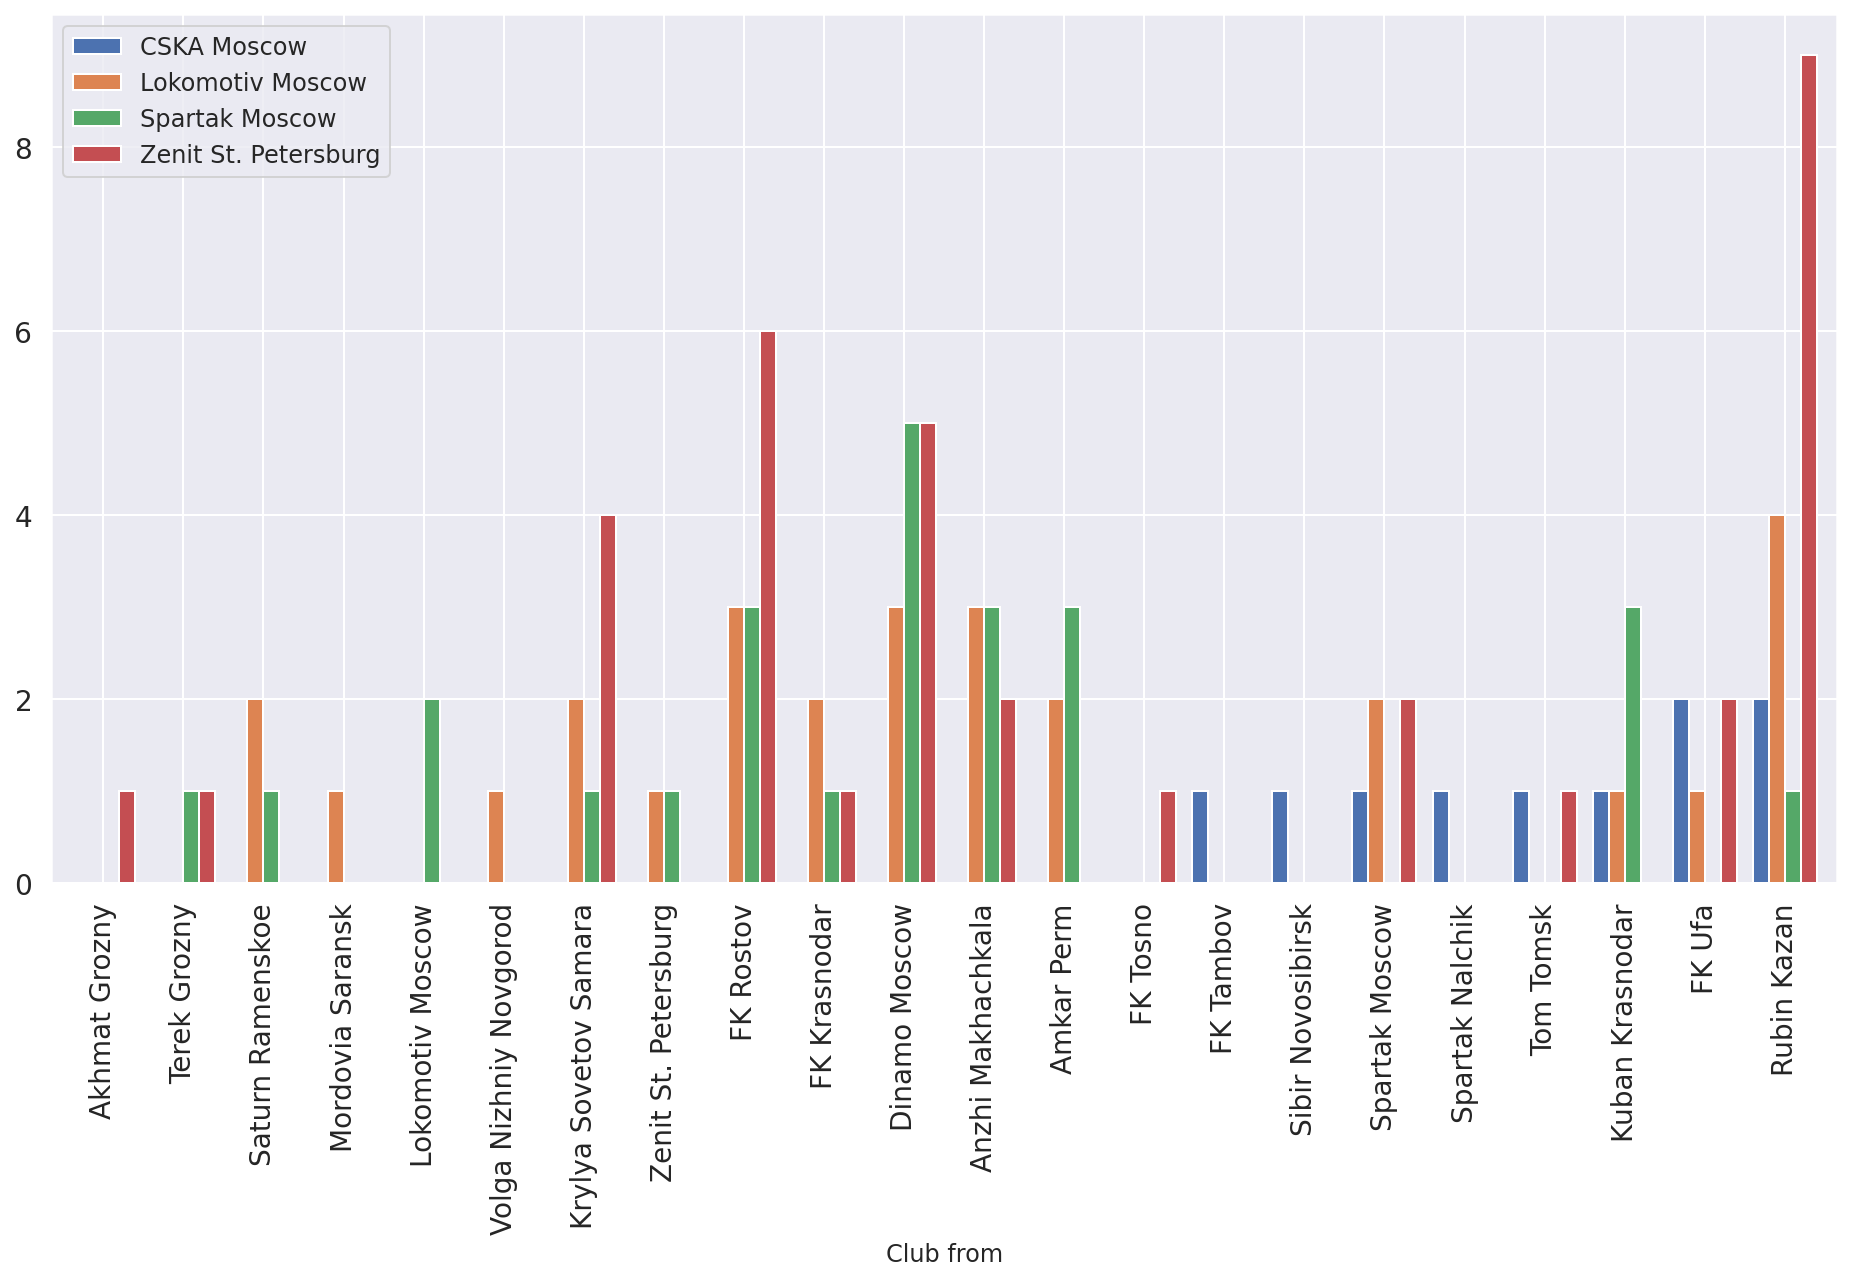

In [ ]:
df_top4_pivot.sort_values(by = 'CSKA Moscow').plot(kind = 'bar', figsize=(16, 8), width = 0.8, fontsize = 14)
plt.legend(loc=2, fontsize='large')

In [ ]:
df_top4_other = df[df['Club to'].isin(top4) & (~df['Club from'].isin(rus_clubs)) & (df['Transfer type'] != 'Academy') &
             (df['Transfer type'] != 'Loan ') & (~df['Transfer type'].astype(str).str.startswith('End')) & (~df['Transfer type'].astype(str).str.startswith('Loan'))].reset_index(drop=True)
print('Amount of transfers into top4 clubs from clubs of other leagues:', df_top4_other.shape[0])

Amount of transfers into top4 clubs from clubs of other leagues: 125


####Results:
As clubs from top 4 got more money on transfers they prey on weaker ones(when they want to buy chosen player) but overall they prefer to get foreign players or players from the academies for their squads.

##Prop 8

In [ ]:
df_acad = df.loc[(df['Nationality'] == 'Russia') & (df['Transfer type'] == 'Academy') & (df['Club to'].isin(rus_clubs)) & (df['Club from'] != ' \xa0\xa0Without Club')]

In [ ]:
df_not_acad = df.loc[(df['Nationality'] == 'Russia') & (df['Transfer type'] != 'Academy') & (df['Transfer type'] != 'Loan ') & 
       (~df['Transfer type'].astype(str).str.startswith('End')) & (df['Club to'].isin(rus_clubs)) & (~df['Club from'].isin(rus_clubs))]

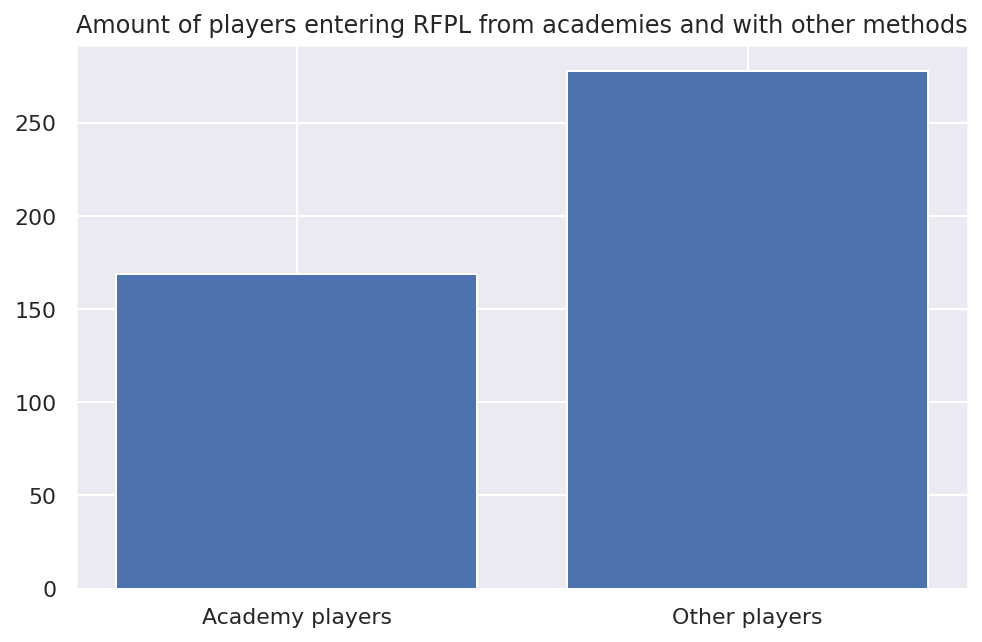

In [ ]:
x = np.arange(2)
vals_2 = [len(df_acad), len(df_not_acad)]

plt.figure(figsize=(8,5))
plt.bar(x, vals_2)
plt.xticks(x, ('Academy players', 'Other players'))
plt.title('Amount of players entering RFPL from academies and with other methods')
plt.show()

####Reslts:
Most russian players enter RFPL with other methods rather than from academies.

##Prop 9

In [ ]:
df_from_rfpl = df[df['Club from'].isin(rus_clubs) & (~df['Club to'].isin(rus_clubs))& (df['Club to'] != ' \xa0\xa0Without Club') & (df['Transfer type'] != 'Academy') & (df['Transfer type'] != 'Career stopage') &
             (df['Transfer type'] != 'Loan ') & (~df['Transfer type'].astype(str).str.startswith('End')) & (~df['Transfer type'].astype(str).str.startswith('Loan'))].reset_index(drop=True)

In [ ]:
df_to_rfpl = df[~df['Club from'].isin(rus_clubs) & (df['Club to'].isin(rus_clubs)) & (df['Transfer type'] != 'Academy') &
             (df['Transfer type'] != 'Loan ') & (~df['Transfer type'].astype(str).str.startswith('End')) & (~df['Transfer type'].astype(str).str.startswith('Loan'))].reset_index(drop=True)

In [ ]:
inter = set(df_to_rfpl['Players Name'].unique().tolist()).intersection(set(df_from_rfpl['Players Name'].unique().tolist()))

In [ ]:
print("Amount of players that left RFPL to foreign clubs:", len(df_to_rfpl['Players Name'].unique().tolist()))

Amount of players that left RFPL to foreign clubs: 830


In [ ]:
print("Amount of players that left RFPL to foreign clubs and then returned to RFPL:", len(inter))

Amount of players that left RFPL to foreign clubs and then returned to RFPL: 383


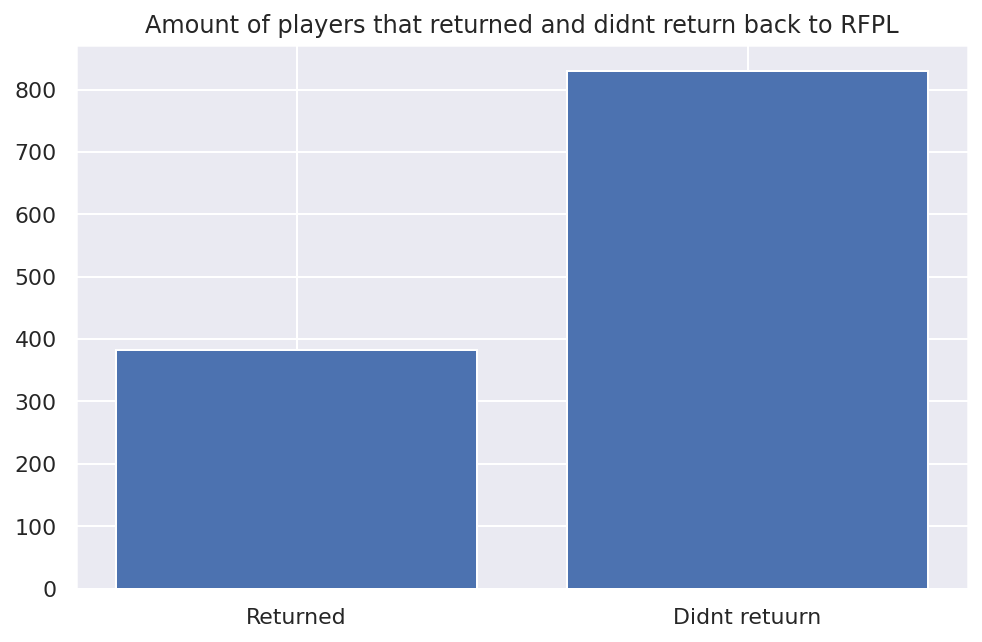

In [ ]:
x = np.arange(2)
vals_2 = [len(inter), len(df_to_rfpl['Players Name'].unique().tolist())]

plt.figure(figsize=(8,5))
plt.bar(x, vals_2)
plt.xticks(x, ('Returned', 'Didnt retuurn'))
plt.title('Amount of players that returned and didnt return back to RFPL')
plt.show()

####Results:
Less than half of total players that left RFPL returned back in future.

##Prop 10,11

In [ ]:
df_old = df[~df['Club from'].isin(rus_clubs) & (df['Club to'].isin(rus_clubs)) & (df['Transfer type'] != 'Academy') & (df['Age'].astype(int) >= 30) & (df['Nationality'] != 'Russia') &
             (df['Transfer type'] != 'Loan ') & (~df['Transfer type'].astype(str).str.startswith('End')) & (~df['Transfer type'].astype(str).str.startswith('Loan'))].reset_index(drop=True)

In [ ]:
print("Number of foreign players older than 30 recruited to RFPL:", len(df_old))

Number of foreign players older than 30 recruited to RFPL: 55


In [ ]:
df_old_stop = df_test[(df_test['Transfer type'] == 'Career stopage') & (df_test['Nationality'] == 'Europe')].reset_index(drop=True)

In [ ]:
print("Amount of foreign players that stoped their careers in RFPL:", len(df_old_stop))

Amount of foreign players that stoped their careers in RFPL: 21


####Results:
It cant be said that there is any tendency proving current propositions(the value is quite small to make any speculations).